# Introduction 

There are many factors which can affect the viability of a business from its competitiveness to its reputation and customer satisfaction. Customer satisfaction is particularly key as it can affect whether a customer is likely to reuse the service and whether they are likely to recommend the service ([Silver, 2019](https://www.americanexpress.com/en-us/business/trends-and-insights/articles/retaining-customers-vs-acquiring-customers/)). This is further emphasised by sources which highlight that retaining existing customers can be 4 to 10 times more cost effective then securing new customers ([Kingwill, 2015](https://www.linkedin.com/pulse/what-cost-customer-acquisition-vs-retention-ian-kingwill/)). 

Subsequently, this report will evaluate the results of an anonymised airline passenger satisfaction survey. It will aim to understand the strengthens of the airlines as well as its weaknesses. It will also seek to provide a strategic route to improvements. 

# Business Objective 
* Understand the demography of the passengers utilising the airline
* Identify strengths and weaknesses in the airline's offering
* Suggest areas of focus for improved satisfaction


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

# libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

#set style of graphs
sns.set_style("white")

df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv", )
df.drop("Unnamed: 0", axis = 1, inplace = True)

# create formula to calcuate the dissatisfied rate based on a variable
# method modified from https://www.youtube.com/watch?v=ICxUS4MGioE&t=1242s. 
#credit to Data Science With Chris. 
def pivot_satisfaction (train, target): 
    
    df_pivot = pd.pivot_table(
        train[["id", target, "satisfaction"]],
        index = [target], 
        columns = ["satisfaction"], 
        aggfunc = "count", 
        fill_value =0).reset_index()
    
    df_pivot.columns = [target, "neutral or dissatisfied", "satisfied"]
    
    df_pivot["total"] = df_pivot["satisfied"]+df_pivot["neutral or dissatisfied"]
    df_pivot["dissatisfied_rate"] = df_pivot["neutral or dissatisfied"]/df_pivot["total"]*100
    
    return df_pivot

# Overview
Examining the data, over half of the passengers surveyed, 56.67%, report that they were either "neutral or dissatisfied" with the services provided. In addition, concerningly even loyal customers which can tend to be more forgiving of a company's services reported issues.  This suggest that if the situation is left as is, the airline is at risk of looking passengers which in turn will affect their bottom line.

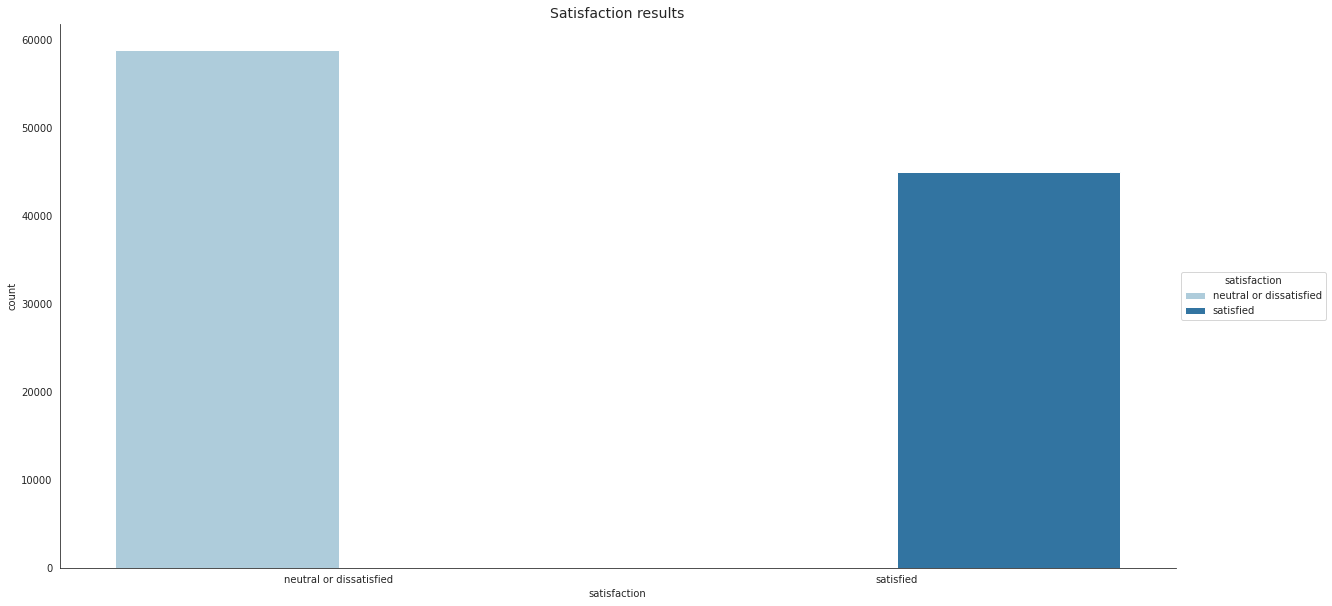

In [2]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="satisfaction", data = df, hue ="satisfaction", palette ="Paired" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction results", fontsize = 14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [3]:
print(round((df[df["satisfaction"]=="neutral or dissatisfied"].shape[0]/df.shape[0])*100, 2),"% of the passenger were neutral or dissatisfied with the service provided by the airline")

56.67 % of the passenger were neutral or dissatisfied with the service provided by the airline


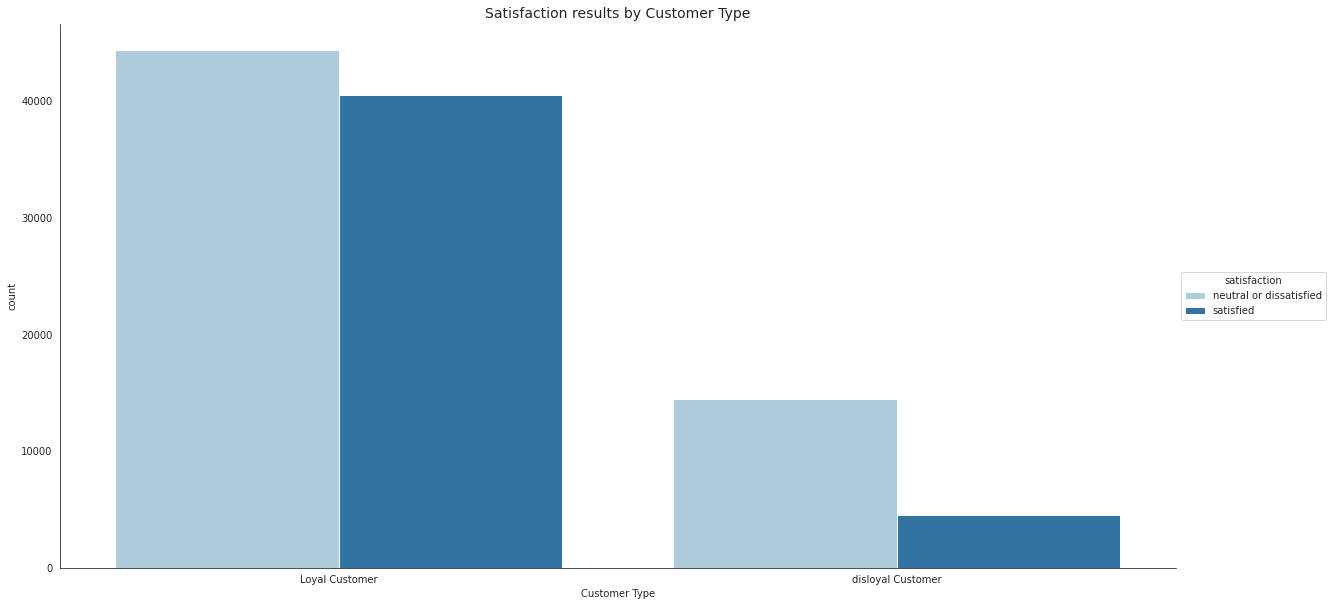

In [4]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Customer Type", data = df, hue ="satisfaction" ,palette ="Paired" )

# format graph
plt.title("Satisfaction results by Customer Type", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [5]:
# calcuate dissatisfied_rate for gender
pivot_satisfaction(df,"Customer Type")

,Customer Type,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Loyal Customer,44390,40533,84923,52.270881
1,disloyal Customer,14489,4492,18981,76.334229


As the report will highlight, some aspects of the dissatisfaction may be linked with strategic decision by the airline to prioritise specific aspects of the service. Therefore some improvement may further enforce this strategic decision whist others may favour alternative aspects of the airline's operations. The final decision and route of improvement will need to be made with this in mind. 

Furthermore, this report only focuses on the data surrounding a passenger survey. It cannot and will not delve into aspects such as costs and profitability which can also affect investment decisions.  Moreover, the airline should pay attention to aspects beyond their operations and to trends in the global market before making decisions.

This report is divided into three major sections: 
* Demography and factors related to travel,
* Passenger's rating of various aspects pertaining to its service,
* Suggested order of improvements. 

# Demography
It is clear that the airline holds a specific strength in handling business travellers, especially those between 40 and 60 year olds.  Further decisions with the airline is needed to understand if they further wish to further reinforce this strength or are wishing to diversify their operations. 

In contrast, the airlines has notable issues in servicing the younger demography and Economic travellers. Given the changing nature of business, coupled with the feedback from younger travellers, including business travellers, it is encouraged the airline looks upon the suggestions in a positive light and aim to implement some changes. 

The skew in the satisfaction level based on flight distance suggest perhaps there may be some underlying issues with the packages offered for short haul. For example, issues pertaining to luggage sizes may be causing frustrations with passengers. This will require further investigation by the airline. 

## Gender
The rate of dissatisfaction with services appears to be relatively even between the genders with over half of each gender reporting issues. 

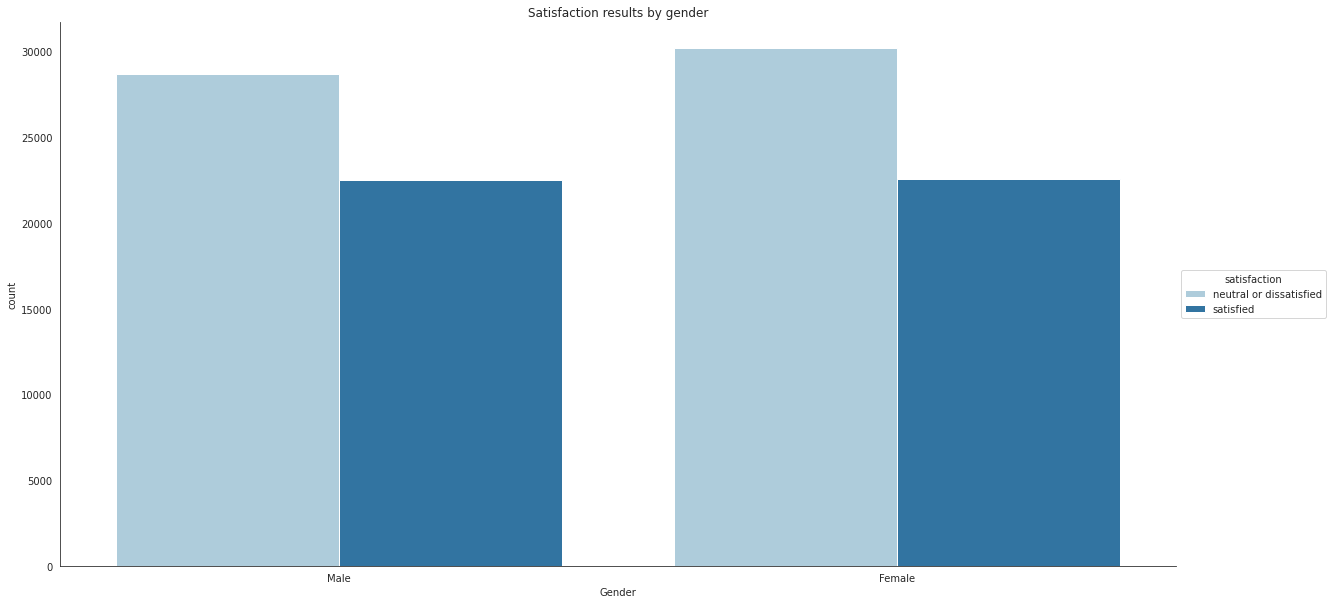

In [6]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Gender", data = df, hue ="satisfaction", palette ="Paired" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction results by gender")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [7]:
# calcuate dissatisfied_rate for gender
pivot_satisfaction(df,"Gender")

,Gender,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Female,30193,22534,52727,57.262882
1,Male,28686,22491,51177,56.052524


In [8]:
print("Age range of passengers:",df["Age"].min(),"-",df["Age"].max())
print("Average age:", round(df["Age"].mean()))

Age range of passengers: 7 - 85
Average age: 39


## Age
The average age of the passengers is approx. 40 years old and the airline services passengers as young as 7 and old as 85 years old. The data indicates that those between 40 and 60 were most likely to find the service satisfactory but those outside this range particularly over 60s found the service lacking. 

This suggests several issues including: 
* Airline not servicing parties with particular needs such as young families and those with medical issues, 
* Aspects of the services require modernising. 

Analysis of other aspects of the survey will confirm which is the most likely cause of dissatisfaction amongst travellers. 

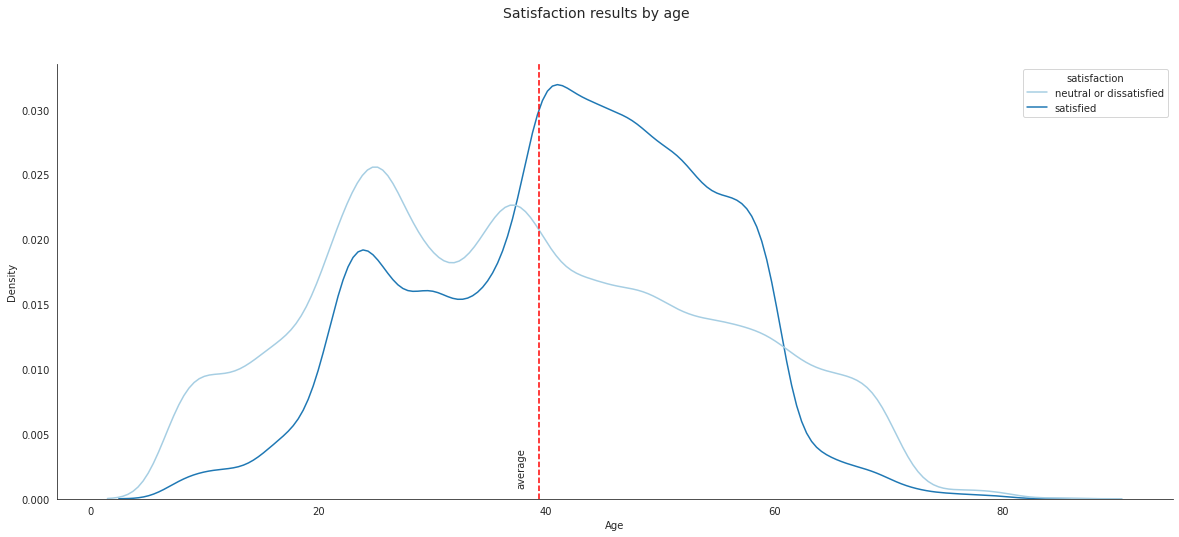

In [9]:
# create graph
plt.figure(figsize = (20,8))
sns.kdeplot(data = df, x= "Age", hue = "satisfaction", common_norm = False, palette ="Paired")

# format graph
plt.suptitle("Satisfaction results by age", fontsize = 14,)
sns.despine(top = True, right = True, left = False, bottom = False)
#
plt.axvline(df["Age"].mean(),ls = "--", color = "red")
plt.text(df["Age"].mean()-2,0.001,'average',rotation=90)
plt.show()

In [10]:
def age_group (row): 
    if row < 40: 
        return "Young"
    if (row >= 40) & (row < 60): 
        return "middle age"
    if row >= 60:
        return "senior"
    else:
        return "no age"
    
df["Age_group"] = df["Age"].apply(lambda row: age_group(row))

# calcuate dissatisfied_rate
pivot_satisfaction(df,"Age_group")

,Age_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Young,33692,17694,51386,65.566497
1,middle age,18104,24695,42799,42.300054
2,senior,7083,2636,9719,72.877868


## Purpose of travel
As Age highlighted, airline may have issues providing support to those with particular needs. This suspicion is enforced when the purpose of travel is examined.  For personal travellers, reported a extremely high, 90%, rate of dissatisfaction. 

This is not to discount the need for modernisation. Firstly, dissatisfaction amongst personal travellers did not appear to alter with age. In addition, business travellers under 40s business also reported issues with the service. 

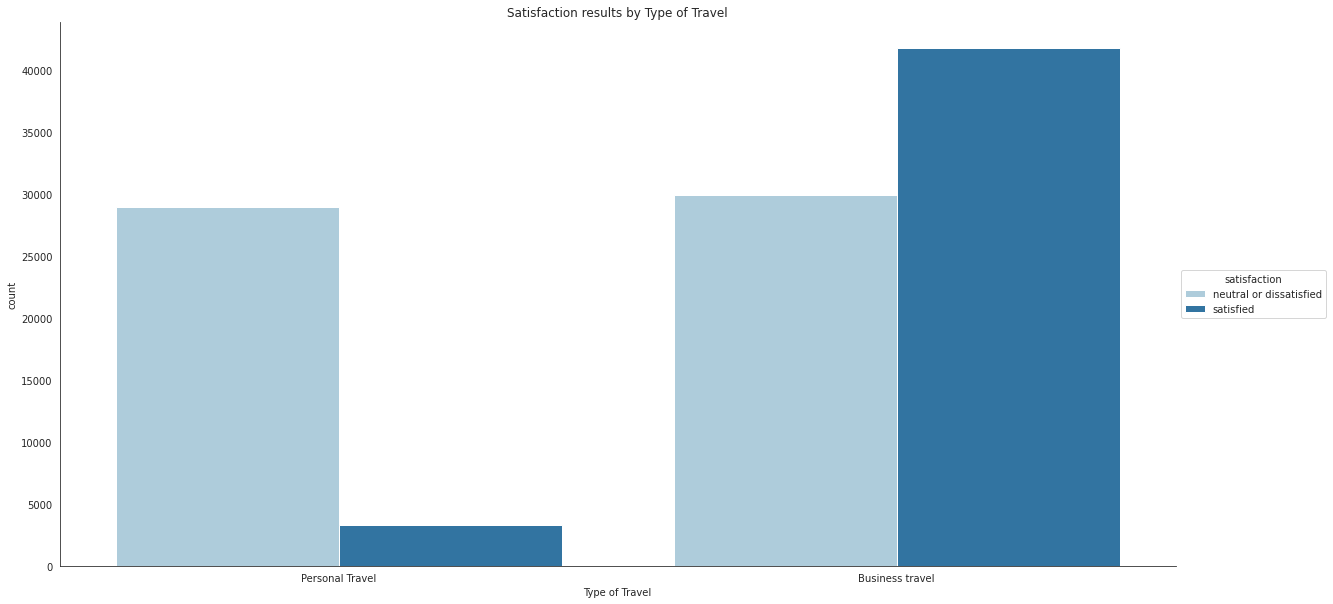

In [11]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Type of Travel", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Type of Travel")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [12]:
# split dataset by travel type
Business_Travel = df[df["Type of Travel"]=="Business travel"]
Personal_travel = df[df["Type of Travel"]=="Personal Travel"]

# calcuate new dissatisfied_rate 
pivot_satisfaction(df,"Type of Travel")

,Type of Travel,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Business travel,29909,41746,71655,41.740283
1,Personal Travel,28970,3279,32249,89.832243


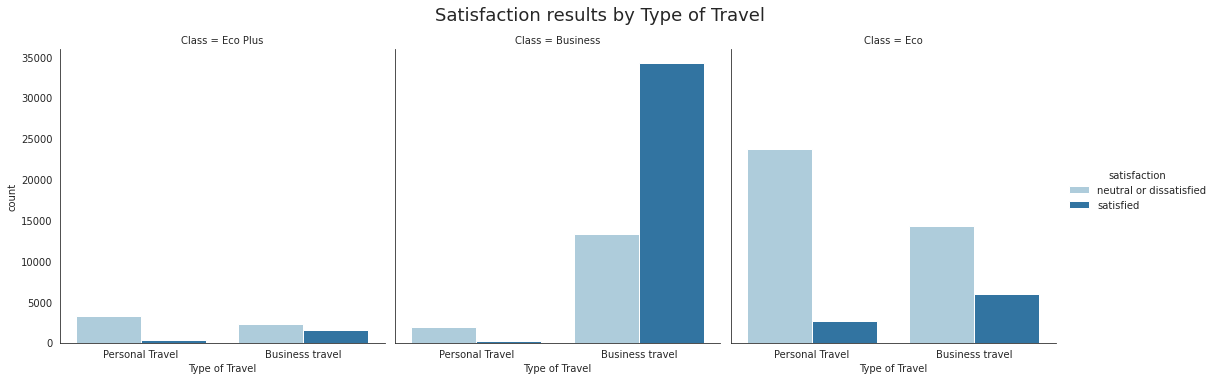

In [13]:
# create graph 
sns.catplot(x ="Type of Travel", hue = "satisfaction", col = "Class", data = df, kind = "count", palette ="Paired", )
plt.suptitle("Satisfaction results by Type of Travel", y = 1.05, fontsize = 18)
plt.show()

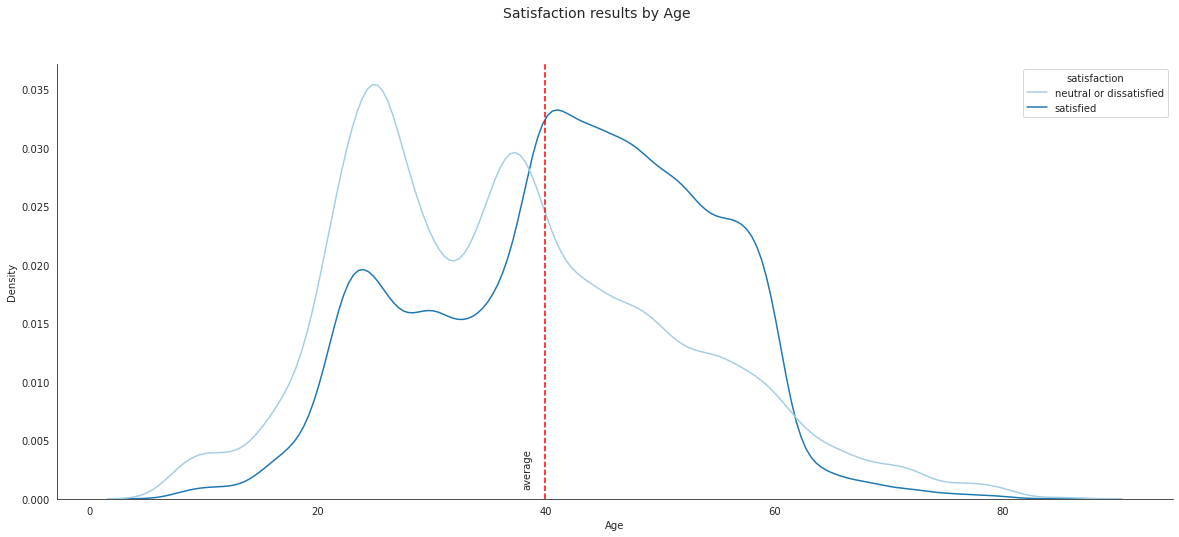

In [14]:
# create graph
plt.figure(figsize = (20,8))
sns.kdeplot(data = Business_Travel, x= "Age", hue = "satisfaction", common_norm = False, palette ="Paired")

# format graph
plt.suptitle("Satisfaction results by Age", fontsize = 14,)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.axvline(Business_Travel["Age"].mean(),ls = "--", color = "red")
plt.text(Business_Travel["Age"].mean()-2,0.001,'average',rotation=90)
plt.show()

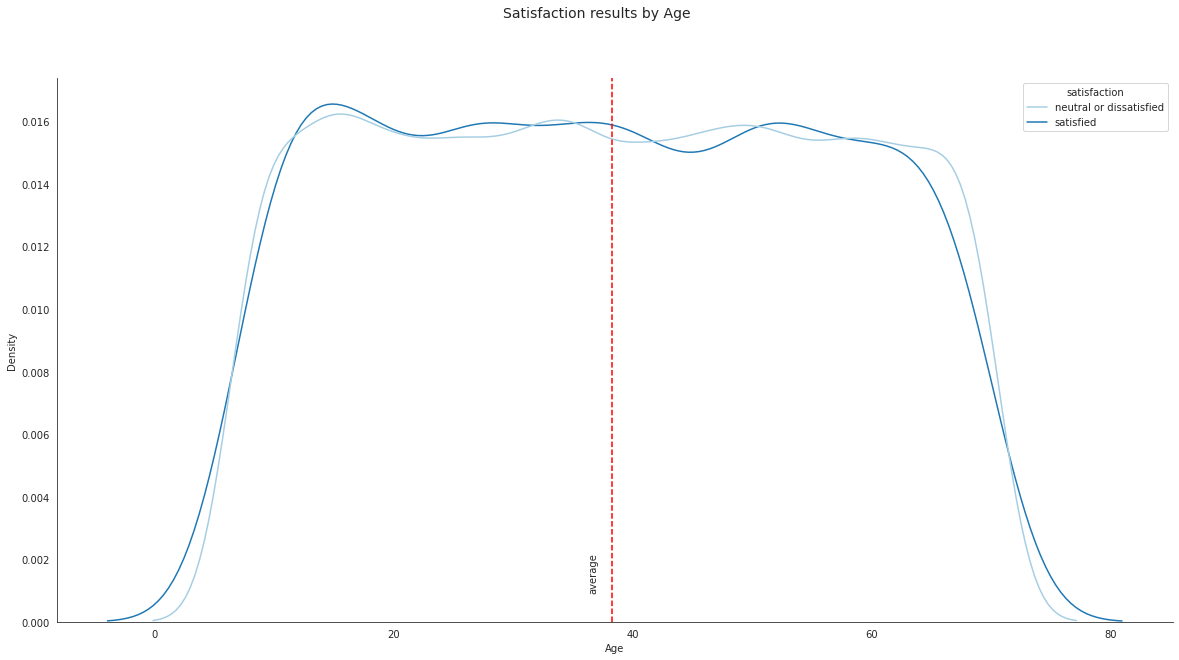

In [15]:
# create graph
plt.figure(figsize = (20,10))
sns.kdeplot(data = Personal_travel, x= "Age", hue = "satisfaction", common_norm = False, palette ="Paired")

# format graph
plt.suptitle("Satisfaction results by Age", fontsize = 14,)
sns.despine(top = True, right = True, left = False, bottom = False)
#
plt.axvline(Personal_travel["Age"].mean(),ls = "--", color = "red")
plt.text(Personal_travel["Age"].mean()-2,0.001,'average',rotation=90)
plt.show()

## Classes 
The airline offers three different types of tickets, Business, Eco and Eco Plus. The dissatisfaction between different classes of passengers suggests that there are some particular issues affecting the Economic tickets, as the rate of dissatisfaction amongst this group is over 80%.  Eco Plus also has issues to a limited extent. Business class appears to be the best performing with the dissatisfaction rate as low as 31%. 

Whilst this suggest a need for the airline to investigate its Economy ticket offering, there is a need to confirm with the airline on their strategic decisions. If the airline wishes to be one which predominantly cater for business travellers, this aspect may have been accounted for and accepted. Given that there are more business class travellers, the airline may be justified in their decision but it will be dependent on the profitability of this strategy. 

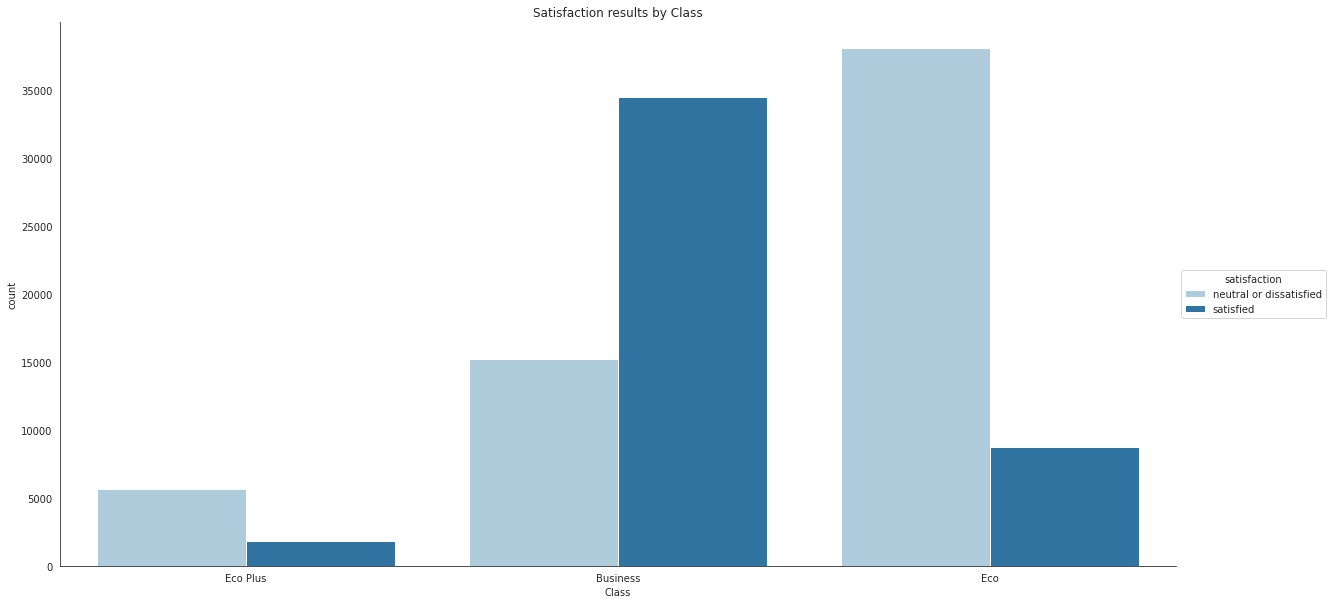

In [16]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Class", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Class")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [17]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(df,"Class")

,Class,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Business,15185,34480,49665,30.574852
1,Eco,38044,8701,46745,81.386245
2,Eco Plus,5650,1844,7494,75.393648


In [18]:
# split dataset by class
Business = df[df["Class"]=="Business"]
Eco = df[df["Class"]=="Eco"]
Eco_Plus = df[df["Class"]=="Eco Plus"]

## Flight distance
Airlines typically alter or even specialise in specific flight distances. This is not only because the provided service such as meals can differ but also because the aircrafts for such journeys can also vary. 

For this airline, the focus appears to be on long haul, above 1500km, flight. These flights are viewed positively by the passengers with 66% satisfaction. However, short haul flights, under 1500km, appear to be a weakness with rate of dissatisfaction is approx. 66.5% . 

Confirmation with the airline is required but this too may be a reflection of the business strategy by the airline. If the airline wishes to compete with short haul airlines such as Ryanair, major changes to the operation may be needed. If, on the other hand, they wish to focus on long haul, they may need to look at the operations of BA, Emirates and other carriers. 

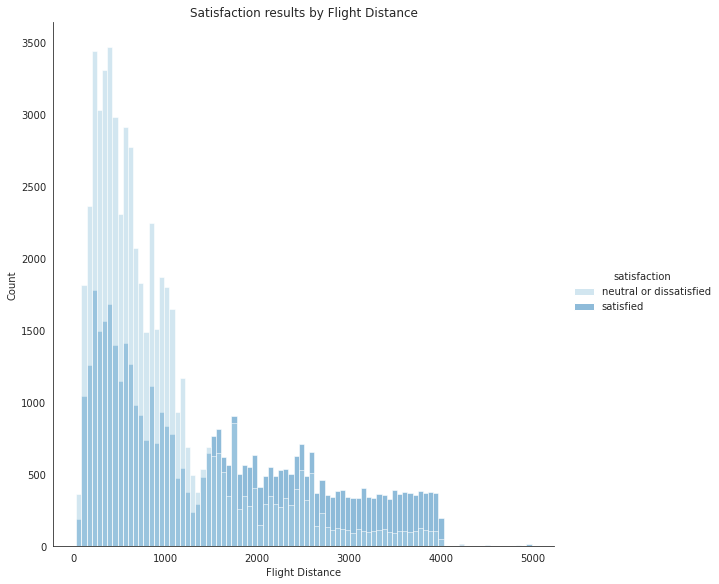

In [19]:
# create graph
sns.displot(x = "Flight Distance", data = df, hue ="satisfaction", height = 8,palette ="Paired"  )
plt.title("Satisfaction results by Flight Distance")

plt.show()

In [20]:
def distance_group (row): 
    if row < 1500: 
        return "less than 1500"
    else:
        return "more than 1500"
    
df["distance_group"] = df["Flight Distance"].apply(lambda row: distance_group(row))

# calcuate dissatisfied_rate
pivot_satisfaction(df,"distance_group")

,distance_group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,less than 1500,48138,24256,72394,66.494461
1,more than 1500,10741,20769,31510,34.087591


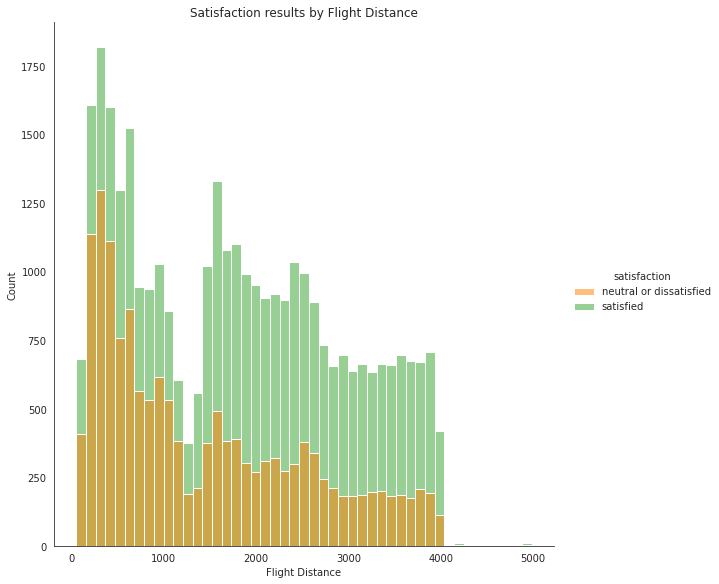

In [21]:
# create graph
sns.displot(x = "Flight Distance", data = Business, hue ="satisfaction", height = 8,palette ="Paired_r"  )
plt.title("Satisfaction results by Flight Distance")

plt.show()

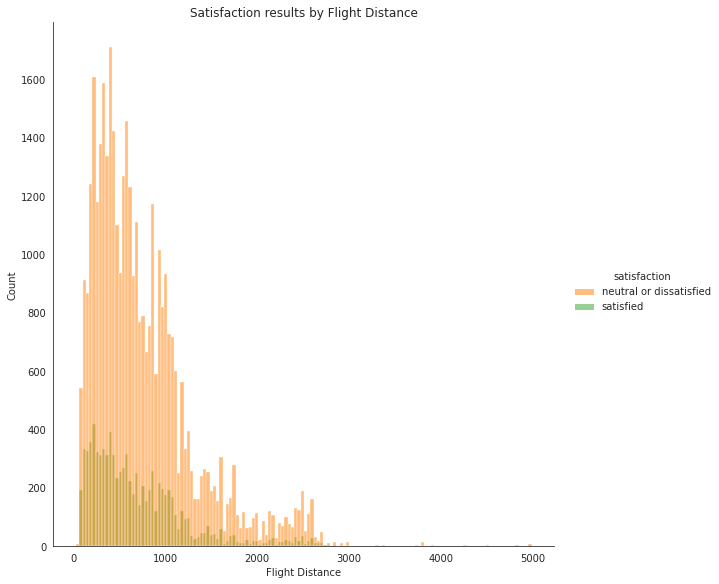

In [22]:
# create graph
sns.displot(x = "Flight Distance", data = Eco, hue ="satisfaction", height = 8,palette ="Paired_r"  )
plt.title("Satisfaction results by Flight Distance")

plt.show()

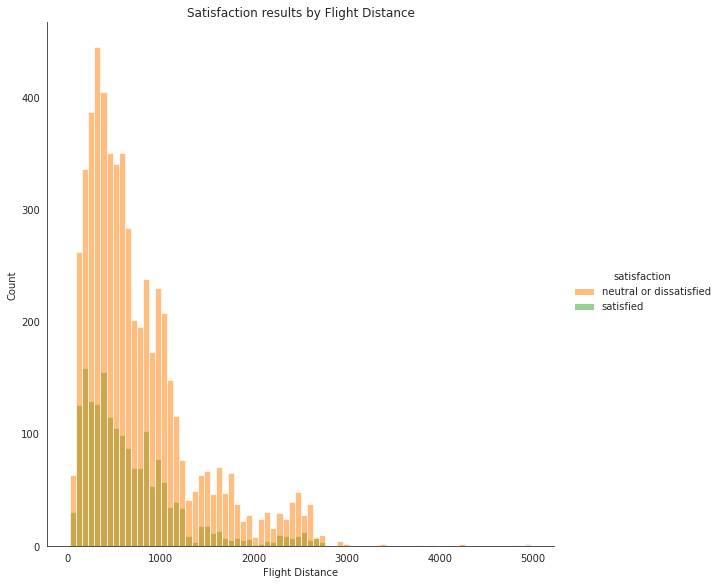

In [23]:
# create graph
sns.displot(x = "Flight Distance", data = Eco_Plus, hue ="satisfaction", height = 8,palette ="Paired_r"  )
plt.title("Satisfaction results by Flight Distance")


plt.show()

## Flight delays  
Delays are a major issue for any airline. It can affect not only the passenger's satisfaction but the scale of the delays could lead to airlines needing to offer refunds and hotel accommodation, depending on the governing laws. In addition, it may also cause scheduling issues as staff and planes are located in incorrect locations. Subsequently flight delays should be examined on its own to understand possible causes and whether similar issues can be mitigated. If the issue was related to parking space and a specific airport, the airline may wish to engage in discussions with said airport. 

As one may expect, examine total delays, arrival and departure delays, it is clear that longer the delay the customers were more likely to be unsatisfied with the services. Interestingly, when class is accounted for, it shows that those travelling via Eco and Eco-Plus were most likely to find the service dissatisfactory. Whilst it may be part of the airline's strategic choice to focus on business class and business travellers, caution should be exercised. Failing to provide adequately for Economy/Economy-Plus and personal travellers may cause major issues such as negative press if not handled properly in cases of major delays. 

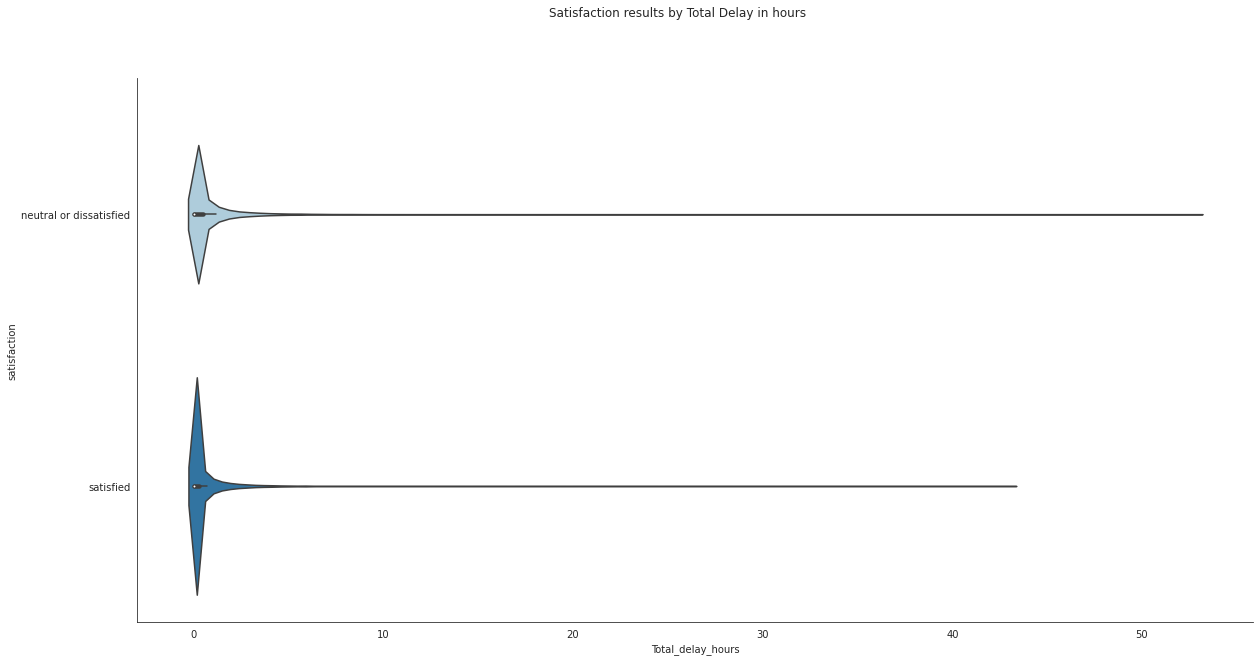

In [24]:
#convert arrival and departure delays to hours
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)
df["Arrival Delay in hour"]= round(df["Arrival Delay in Minutes"]/60,1)
df["Departure Delay in hour"]= round(df["Departure Delay in Minutes"]/60,1)

#establish total delay variable
df["Total_delay_minutes"] = df['Arrival Delay in Minutes']+ df["Departure Delay in Minutes"]
df["Total_delay_hours"] = round(df["Total_delay_minutes"]/60,1)

# create graph
plt.figure(figsize = (20,10))
sns.violinplot(x = 'Total_delay_hours', data = df,y="satisfaction", palette ="Paired")
plt.suptitle("Satisfaction results by Total Delay in hours")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

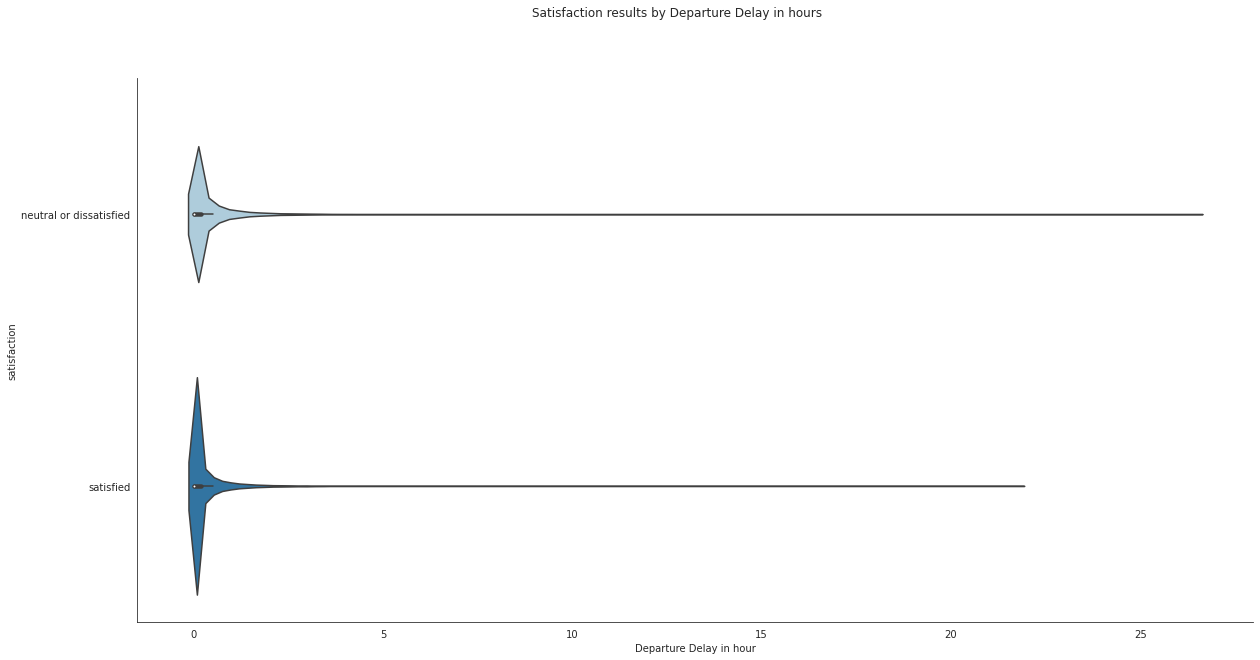

In [25]:
# create graph
plt.figure(figsize = (20,10))
sns.violinplot(x = 'Departure Delay in hour', data = df,y="satisfaction", palette ="Paired")
plt.suptitle("Satisfaction results by Departure Delay in hours")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

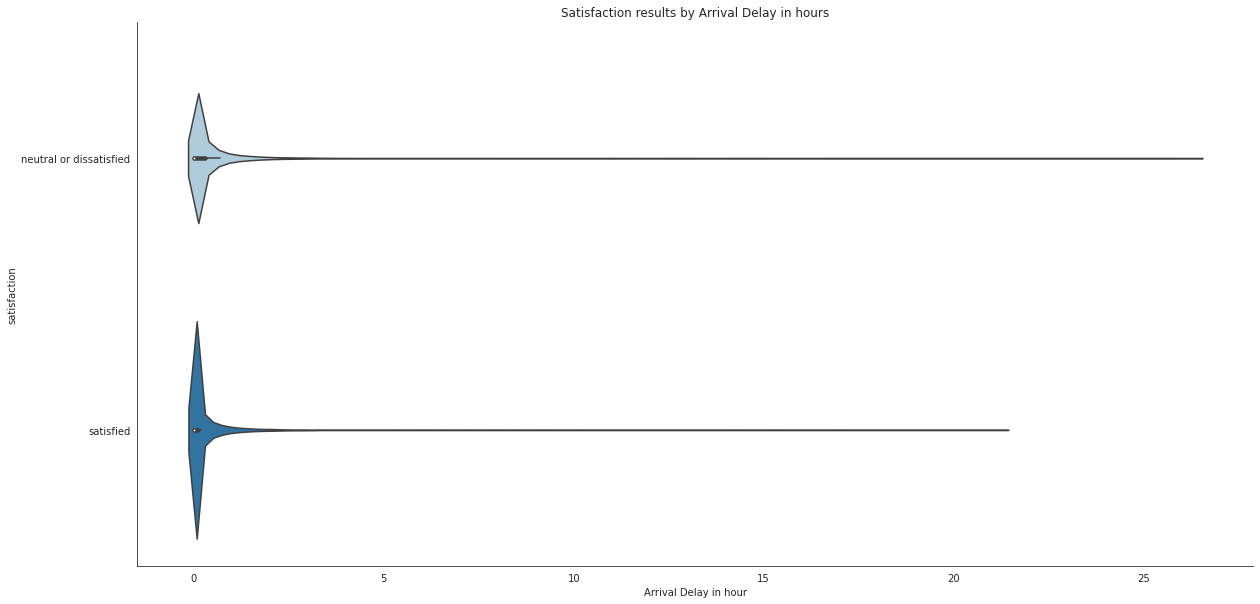

In [26]:
# create graph
plt.figure(figsize = (20,10))

sns.violinplot(x = "Arrival Delay in hour", data = df, y ="satisfaction", height = 8,palette ="Paired"  )
plt.title("Satisfaction results by Arrival Delay in hours")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

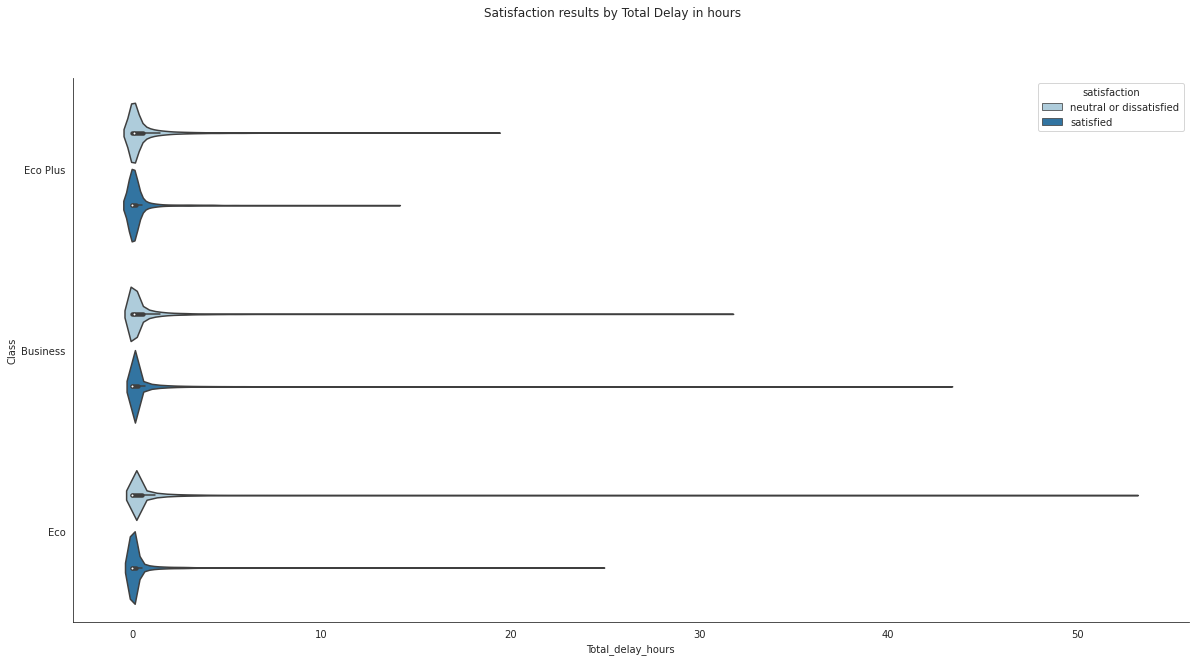

In [27]:
# create graph
plt.figure(figsize = (20,10))
sns.violinplot(x = 'Total_delay_hours', data = df,y= "Class", hue ="satisfaction", palette ="Paired")
plt.suptitle("Satisfaction results by Total Delay in hours")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

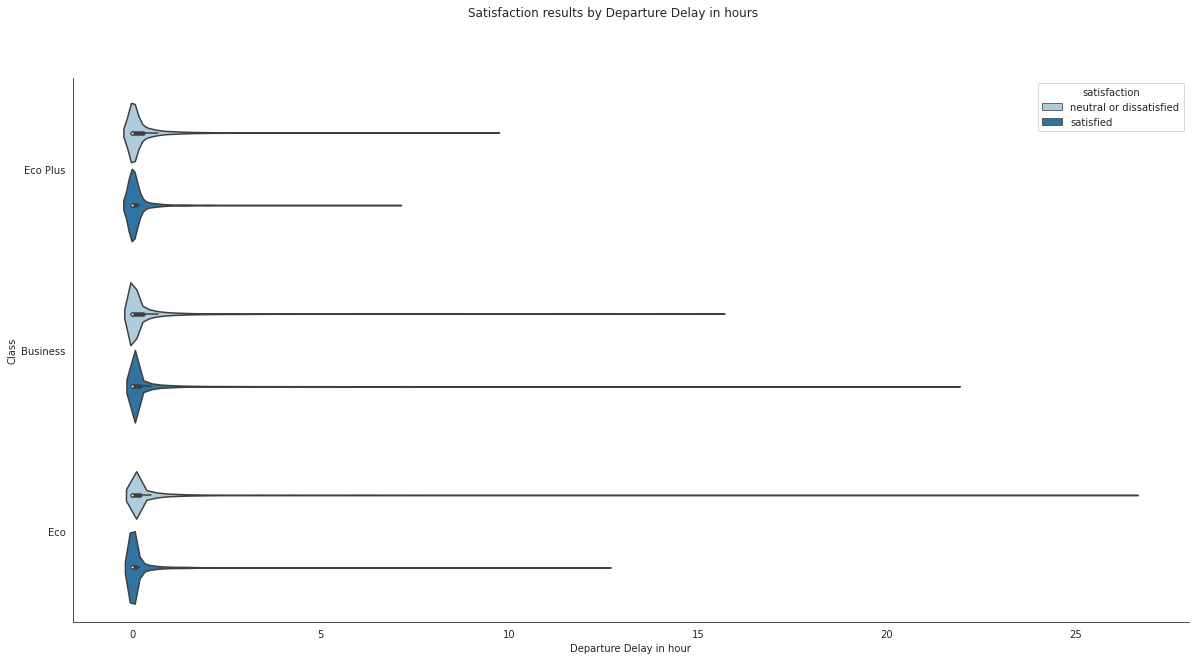

In [28]:
# create graph
plt.figure(figsize = (20,10))
sns.violinplot(x = 'Departure Delay in hour', data = df,y= "Class", hue ="satisfaction",  palette ="Paired")
plt.suptitle("Satisfaction results by Departure Delay in hours")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

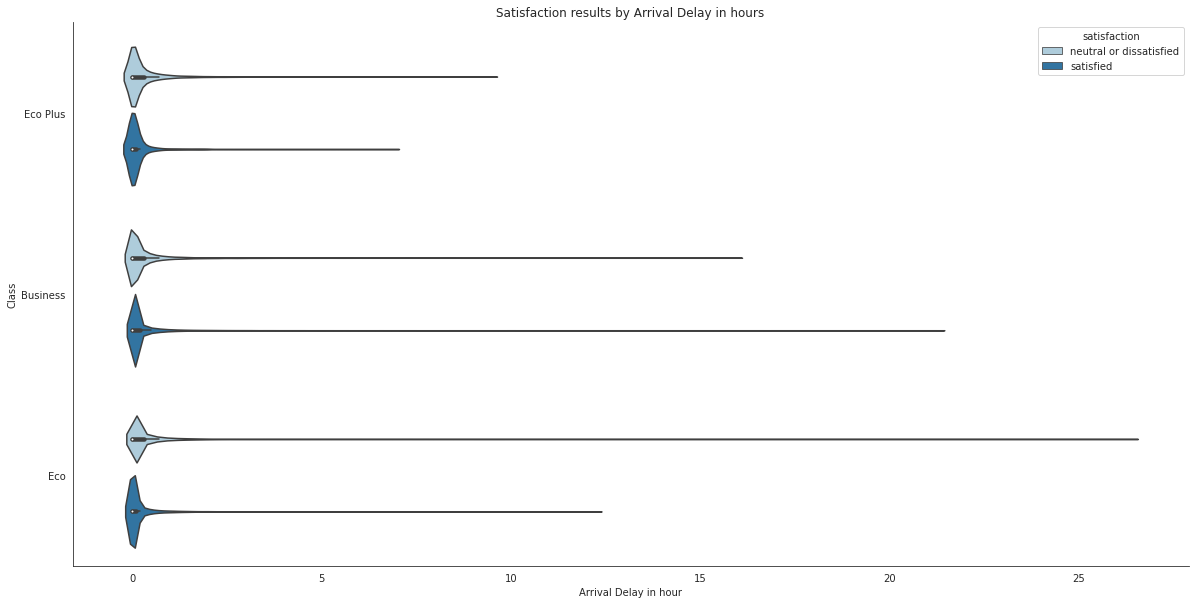

In [29]:
# create graph
plt.figure(figsize = (20,10))

sns.violinplot(x = "Arrival Delay in hour", data = df, y= "Class", hue ="satisfaction", height = 8,palette ="Paired"  )
plt.title("Satisfaction results by Arrival Delay in hours")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

# Services 
The second aspect of the survey is the passenger's rating on the services they received before and during their travel from the airline. Each of these are rated between 1 and 5 with 0 used to indicate a null value or not applicable. The accumulated scores indicate that there is a relationship between the services they received and their overall evaluation of the airline. Those who rated the service poorly were more inclined to rate the  overall service as unsatisfactory. 

The following section will evaluate these responses and suggest the importance of improving a specific aspect of the service alongside how it may affect passenger feedback. Specific focus will be placed upon the nature of travel and, where required, the ticket class. This is to examine whether the trends identified alters when this variable is added. The reasons for focusing on these variables is due to the apparent strategic focus of the airline on one group of travellers and therefor they may wish to weight the suggestions differently based on this factor.

In [30]:
# single out variables which are related to service scores
service_scores = df[['Inflight wifi service','Departure/Arrival time convenient', 
                              'Ease of Online booking','Gate location', 'Food and drink', 
                              'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service',
                              'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']]

df["Total_score"] = service_scores.sum(axis = 1)
max_score = len(service_scores.columns)*5
df["Total_score_percent"] = round((df["Total_score"]/max_score)*100,1)


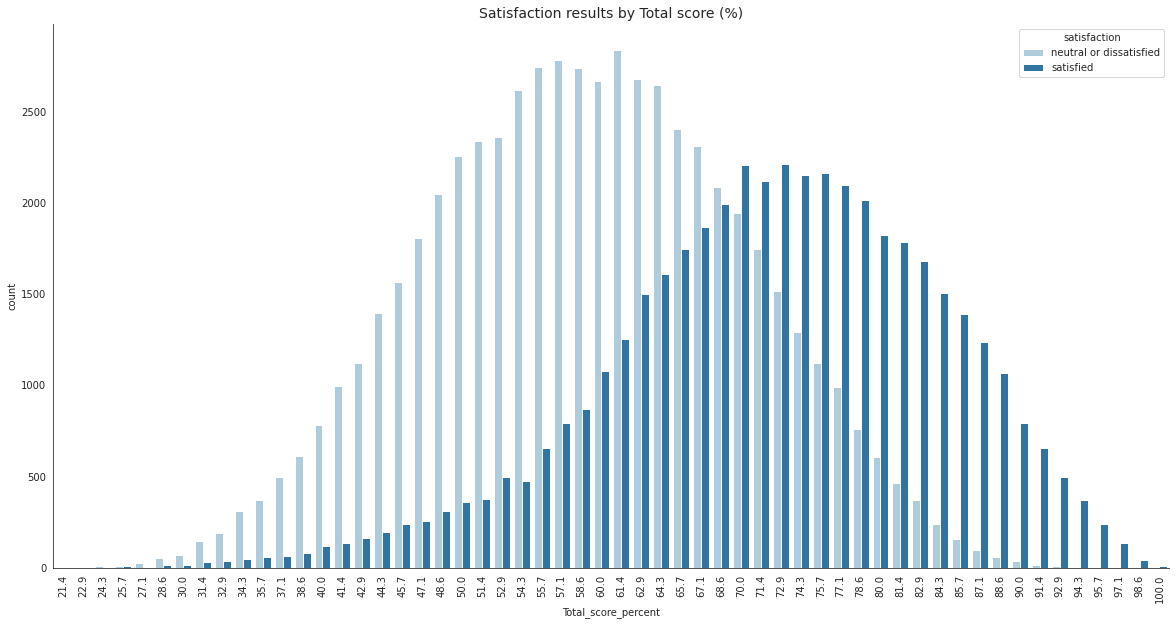

In [31]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Total_score_percent", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Total score (%)", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title = "satisfaction")
plt.show()

## Ease of Online booking
Ease of booking appears to indicate that amongst those who rated the service as 4-5, their overall dissatisfaction was as low was 26%. This suggests that investment in this remit would encourage a improved perception of the airline. Encouragingly, this is an area of service which appears to be valued about both business and personal travellers. As such, regardless of  the airline's business strategy, investment here would be beneficial. 

Furthermore, online bookings may be the first point of contact for a perspective customer. As such, an improvement here posses a possibility of increased cliental. 

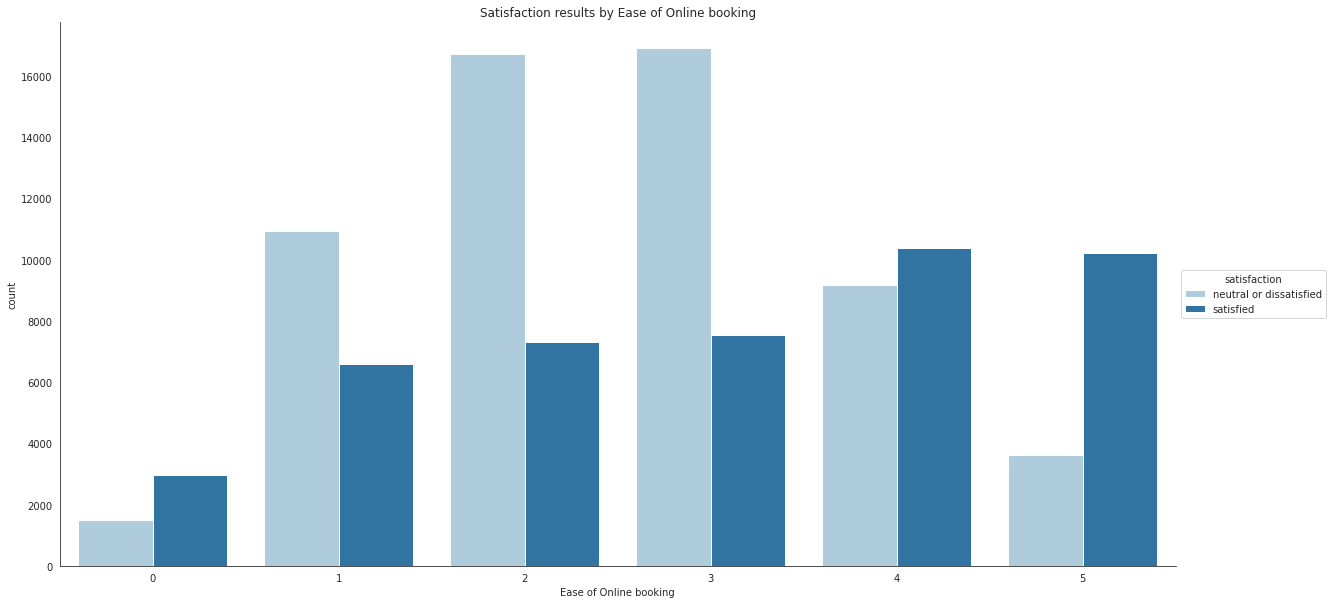

In [32]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x = "Ease of Online booking", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Ease of Online booking")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [33]:
# calcuate dissatisfied_rate
pivot_satisfaction(df,"Ease of Online booking")

,Ease of Online booking,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1507,2980,4487,33.585915
1,1,10935,6590,17525,62.396576
2,2,16720,7301,24021,69.605762
3,3,16912,7537,24449,69.172563
4,4,9180,10391,19571,46.906137
5,5,3625,10226,13851,26.171396


In [34]:
# calcuate dissatisfied_rate for Ease of Online booking - business
pivot_satisfaction(Business_Travel,"Ease of Online booking")

,Ease of Online booking,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,389,2292,2681,14.509511
1,1,5580,6532,12112,46.070013
2,2,7730,7268,14998,51.540205
3,3,7755,7444,15199,51.023094
4,4,5288,9218,14506,36.453881
5,5,3167,8992,12159,26.046550


In [35]:
# calcuate dissatisfied_rate for Ease of Online booking - personal
pivot_satisfaction(Personal_travel,"Ease of Online booking")

,Ease of Online booking,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1118,688,1806,61.904762
1,1,5355,58,5413,98.928505
2,2,8990,33,9023,99.634268
3,3,9157,93,9250,98.994595
4,4,3892,1173,5065,76.841066
5,5,458,1234,1692,27.068558


## Online Booking
The review of the online booking scores further encourages investments in the airline's online platform. Once again as the scores for online bookings increase, the overall dissatisfaction appears to decrease. In addition, compared to ease of online booking, the scale of decrease in dissatisfaction and increase in scores, highlights that this is an area highly valued by passengers. 

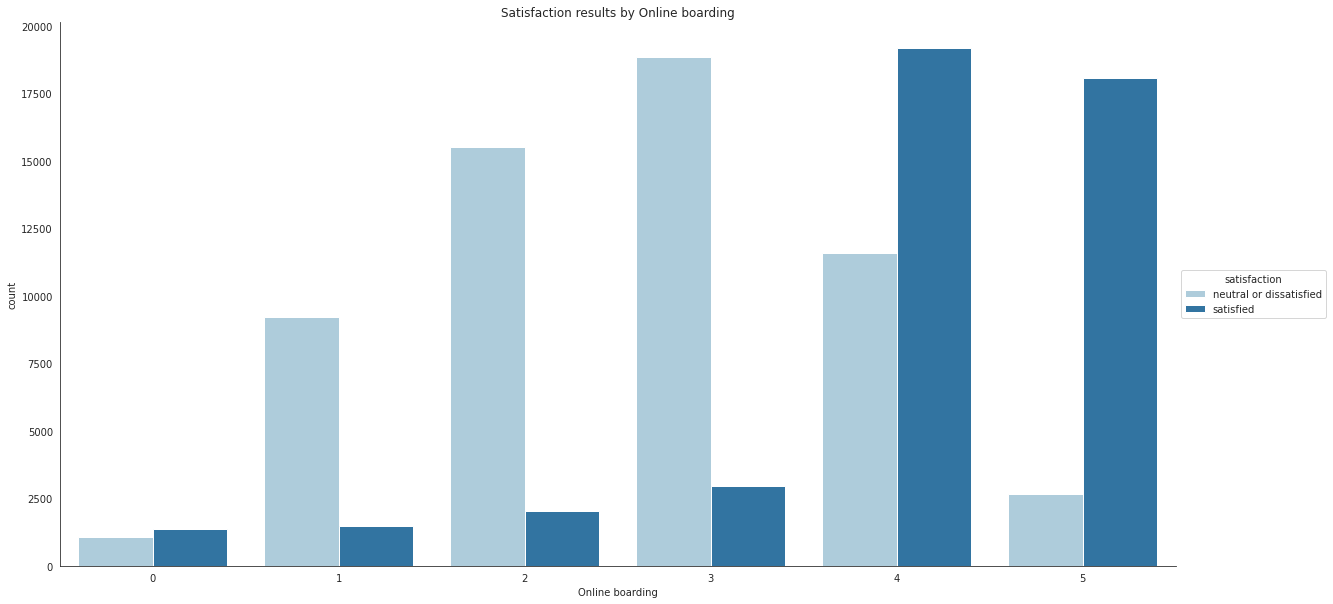

In [36]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Online boarding", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Online boarding")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [37]:
# calcuate dissatisfied_rate
pivot_satisfaction(df,"Online boarding")

,Online boarding,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1077,1351,2428,44.357496
1,1,9219,1473,10692,86.223345
2,2,15486,2019,17505,88.466153
3,3,18845,2959,21804,86.429096
4,4,11596,19166,30762,37.695859
5,5,2656,18057,20713,12.822865


In [38]:
# calcuate dissatisfied_rate for Online boarding - business
pivot_satisfaction(Business_Travel,"Online boarding")

,Online boarding,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,227,865,1092,20.787546
1,1,4748,1377,6125,77.518367
2,2,8211,1895,10106,81.248763
3,3,10616,2733,13349,79.526556
4,4,5868,17942,23810,24.645107
5,5,239,16934,17173,1.391720


In [39]:
# calcuate dissatisfied_rate for Online boarding - personal
pivot_satisfaction(Personal_travel,"Online boarding")

,Online boarding,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,850,486,1336,63.622754
1,1,4471,96,4567,97.897964
2,2,7275,124,7399,98.324098
3,3,8229,226,8455,97.327025
4,4,5728,1224,6952,82.393556
5,5,2417,1123,3540,68.276836


## Check-in service
In contrast to online services, the check-in service appears to have a limited impact on overall satisfaction. Whilst previously when the scores were 4 or above the majority of the passengers rated the overall service satisfactory, here even at a score of 4, over 54% of the passengers indicated dissatisfaction. 

This is not to say that all groups of passengers discounted the value of check-in services. Business travellers appear to value this service. Therefore, the airline may have reasons to invest in this area depending on their business strategy. However, as with online services, they may reap more benefits from improving other aspects of the business before tackling check-in services. Please refer to the suggested order of improvements. 

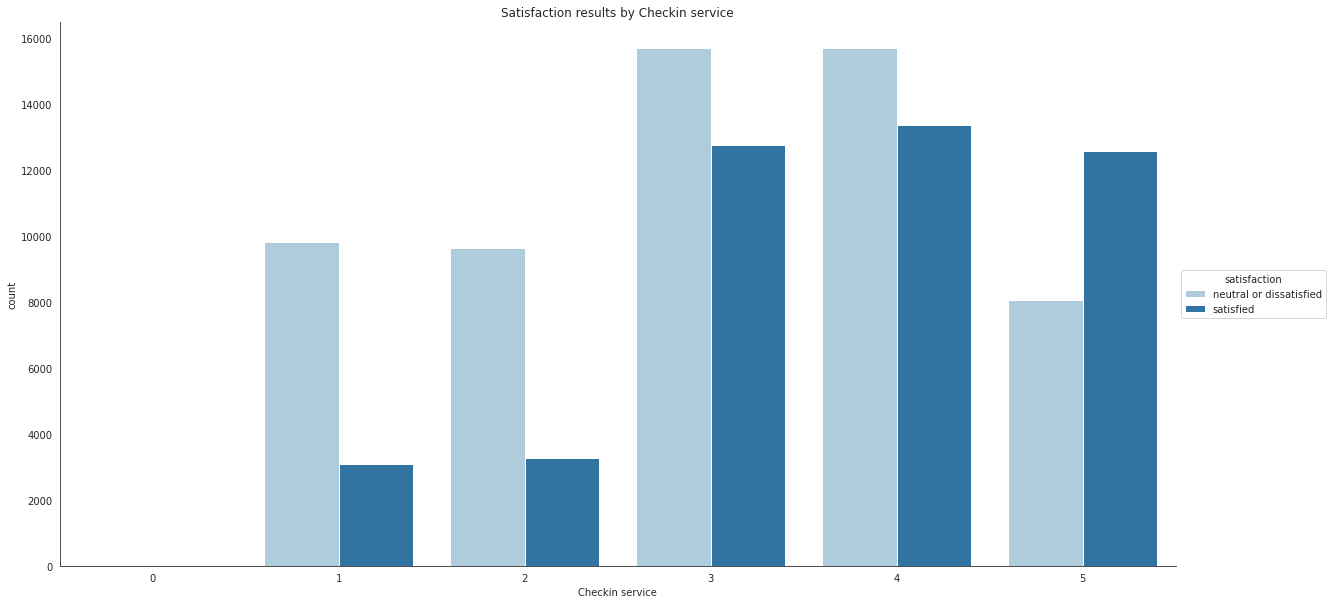

In [40]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ='Checkin service', data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Checkin service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [41]:
# calcuate dissatisfied_rate
pivot_satisfaction(df,'Checkin service')

,Checkin service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,9806,3084,12890,76.074476
2,2,9640,3253,12893,74.769255
3,3,15694,12752,28446,55.171202
4,4,15692,13363,29055,54.007916
5,5,8046,12573,20619,39.022261


In [42]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Business_Travel,'Checkin service')

,Checkin service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,6365,2707,9072,70.160935
2,2,6254,2874,9128,68.514461
3,3,7658,11812,19470,39.332306
4,4,7461,12447,19908,37.477396
5,5,2170,11906,14076,15.416311


In [43]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Personal_travel,'Checkin service')

,Checkin service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,3441,377,3818,90.125720
1,2,3386,379,3765,89.933599
2,3,8036,940,8976,89.527629
3,4,8231,916,9147,89.985788
4,5,5876,667,6543,89.805899


## Baggage handling
Analysis of Baggage handling appears that similar to other variables. As the score increase, the dissatisfaction decreases. However, the breakdown by travel type indicate that this is a feature is not particularly valued deeply by personal travellers as the level of dissatisfaction remains relatively stable regardless of the score. 

Therefore the airline may see greater benefits from focusing first on other aspects of passenger experience. That said, the airline should pay attention to any issues at airports such as the following: 
[A worker at one of Europe's busiest airports says a lack of confidence in baggage handling is leading to flight delays 
](https://www.businessinsider.com/travel-chaos-heathrow-aiport-baggage-handling-flight-delays-2022-8?r=US&IR=T )

Such reports may cause other issues with the passenger experience leading to a negative perception of the airline. 

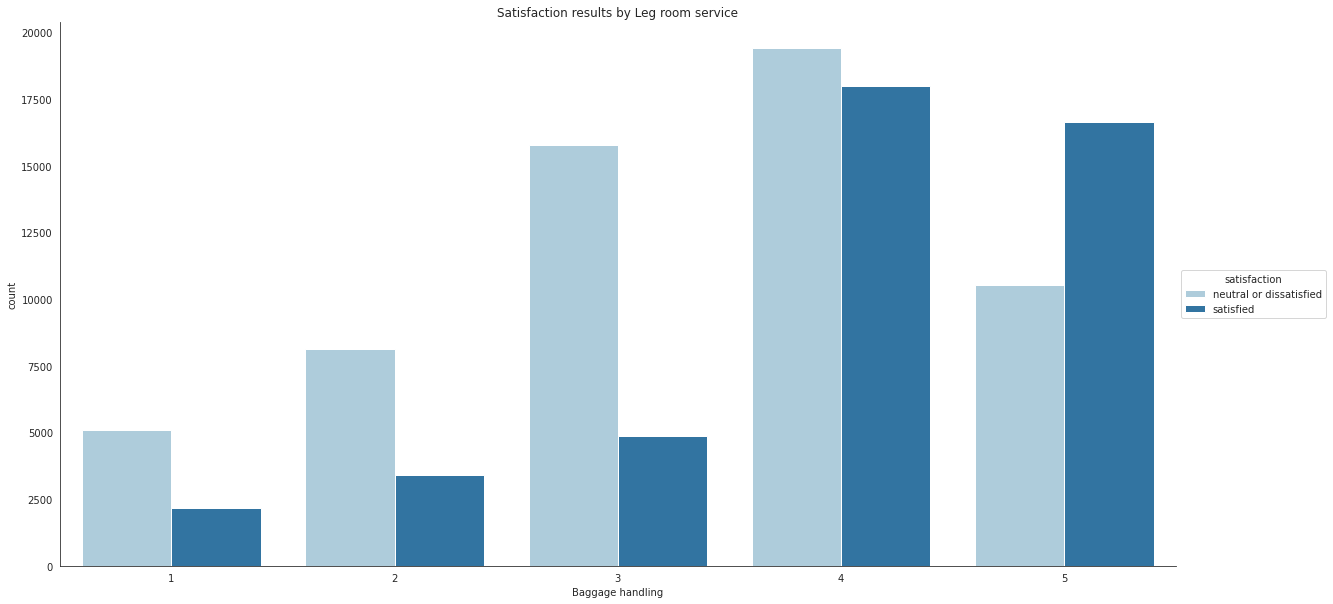

In [44]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ='Baggage handling', data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Leg room service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [45]:
# calcuate dissatisfied_rate
pivot_satisfaction(df,'Baggage handling')

,Baggage handling,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,5083,2154,7237,70.236286
1,2,8117,3404,11521,70.453954
2,3,15766,4866,20632,76.415277
3,4,19405,17978,37383,51.908622
4,5,10508,16623,27131,38.730603


In [46]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Business_Travel,'Baggage handling')

,Baggage handling,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,2571,1856,4427,58.075446
1,2,4808,3042,7850,61.248408
2,3,10025,4227,14252,70.341005
3,4,9636,16860,26496,36.367754
4,5,2869,15761,18630,15.399893


In [47]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Personal_travel,'Baggage handling')

,Baggage handling,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,2512,298,2810,89.395018
1,2,3309,362,3671,90.138927
2,3,5741,639,6380,89.984326
3,4,9769,1118,10887,89.730872
4,5,7639,862,8501,89.860016


## Departure/Arrival time convenient
The departure and arrival time appears to have minimum impact on the overall satisfaction level. Regardless of the score given to the time, the levels of dissatisfaction remain  high and in fact between 3 and 4, overall dissatisfaction increases by 5 percentage point. 

Examining the variable with regards to the passenger's travel reason, business travellers appear to value the convenience as increase in scores can lead to a decrease in dissatisfaction by approx. 18 percentage points. However, for personal travellers, there is no distinct pattern in the relationship between overall dissatisfaction and convenient time. As such, valuing  this aspect and investing in its improvement will be dependent upon airline's overall strategy. 

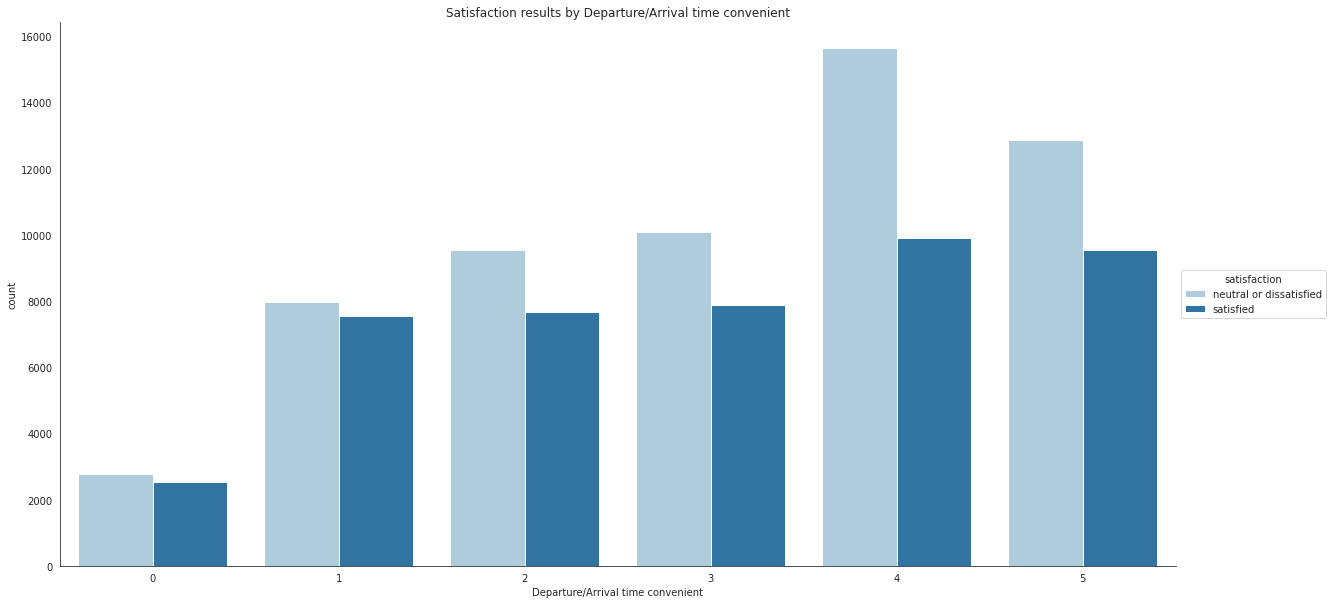

In [48]:
# Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

# create graph
plt.figure(figsize = (20,10))
sns.countplot(x = "Departure/Arrival time convenient", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Departure/Arrival time convenient")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [49]:
# calcuate dissatisfied_rate
pivot_satisfaction(df,"Departure/Arrival time convenient")

,Departure/Arrival time convenient,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,2780,2520,5300,52.452830
1,1,7957,7541,15498,51.342109
2,2,9534,7657,17191,55.459252
3,3,10093,7873,17966,56.178337
4,4,15640,9906,25546,61.222892
5,5,12875,9528,22403,57.469982


In [50]:
# calcuate dissatisfied_rate for Departure/Arrival time convenient - business
pivot_satisfaction(Business_Travel,"Departure/Arrival time convenient")

,Departure/Arrival time convenient,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1992,2439,4431,44.955992
1,1,5513,7257,12770,43.171496
2,2,6782,7348,14130,47.997169
3,3,6635,7531,14166,46.837498
4,4,5372,8704,14076,38.164251
5,5,3615,8467,12082,29.920543


In [51]:
# calcuate dissatisfied_rate for Departure/Arrival time convenient - personal
pivot_satisfaction(Personal_travel,"Departure/Arrival time convenient")

,Departure/Arrival time convenient,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,788,81,869,90.678941
1,1,2444,284,2728,89.589443
2,2,2752,309,3061,89.905260
3,3,3458,342,3800,91.000000
4,4,10268,1202,11470,89.520488
5,5,9260,1061,10321,89.719988


## Gate location
It appears that the gate location and its impact on overall satisfaction is weak. Even a score of 4 for gate location returns a dissatisfaction rate of 61%. Furthermore, for personal travellers the dissatisfaction rate increases by a percentage point between 4 and 5.  Even for business travellers, the value of improved gate location appears to be limited. 

Moreover, gate location is not an aspect which the airline could improve so that it will benefit all customers. Given the design of the airport, some gate locations will be inconvenient compared to other. It is rather for the airport to ensure that passengers can arrive at the said gate without delay and confusion. 

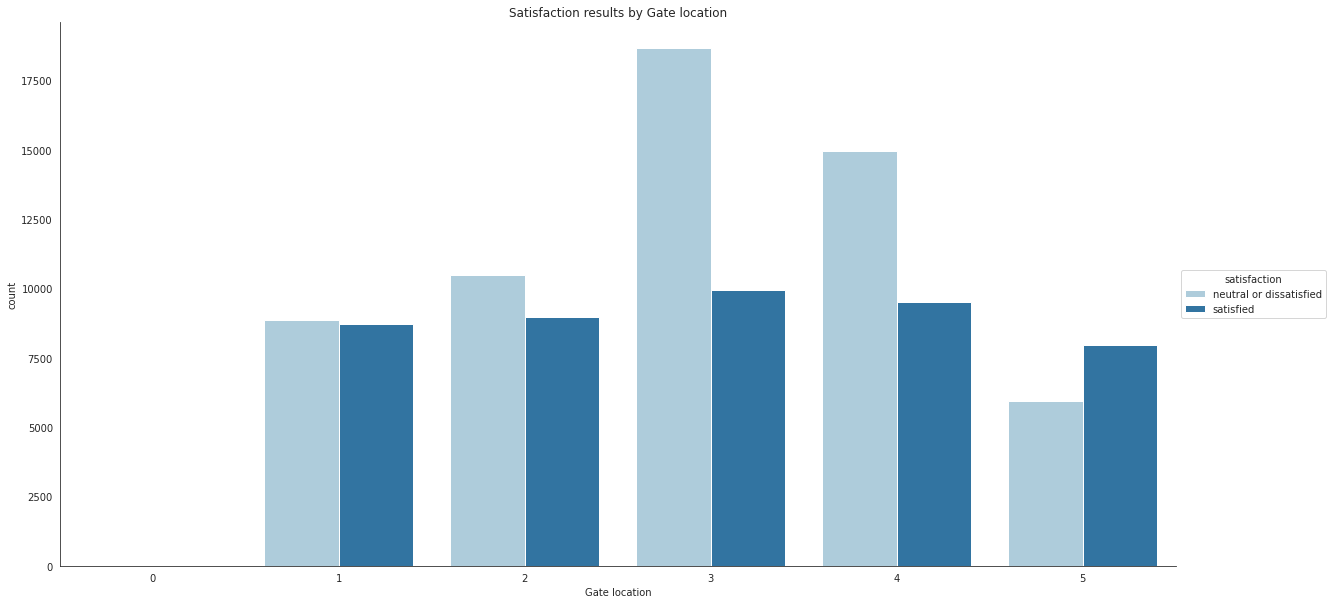

In [52]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Gate location", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Gate location")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [53]:
Gate = df.copy()
Gate["satisfied"] = np.where(Gate["satisfaction"]=="satisfied",1,0)

# calcuate correlation for gate location and satisfaction 
Gate[['Gate location', "satisfied"]].corr()

,Gate location,satisfied
Gate location,1.000000,0.000682
satisfied,0.000682,1.000000


In [54]:
# calcuate dissatisfied_rate
pivot_satisfaction(df,"Gate location")

,Gate location,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,0,1,1,0.000000
1,1,8859,8703,17562,50.444141
2,2,10494,8965,19459,53.928773
3,3,18655,9922,28577,65.279770
4,4,14936,9490,24426,61.147957
5,5,5935,7944,13879,42.762447


In [55]:
# calcuate dissatisfied_rate for Gate location - business
pivot_satisfaction(Business_Travel,"Gate location")

,Gate location,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,0,1,1,0.000000
1,1,4601,8206,12807,35.925666
2,2,5267,8360,13627,38.651207
3,3,8561,8781,17342,49.365702
4,4,7623,8660,16283,46.815697
5,5,3857,7738,11595,33.264338


In [56]:
# calcuate dissatisfied_rate for Gate location - personal
pivot_satisfaction(Personal_travel,"Gate location")

,Gate location,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,4258,497,4755,89.547844
1,2,5227,605,5832,89.626200
2,3,10094,1141,11235,89.844237
3,4,7313,830,8143,89.807196
4,5,2078,206,2284,90.980736


## Seat comfort
Seat comfort, like may of the other variables, show that an increase in scores lead to a decrease in overall dissatisfaction. This is shared with both parties, business and personal travellers. However, the margins greatly differ. For business travellers there is a 55 percentage point difference in the level of overall dissatisfaction whilst for personal travellers, it is less than a percentage point. 

Examining the data with respect to class indicates that business class travellers were extremely likely to view the overall experience in a favourable light if they found the seats comfortable. The dissatisfaction amongst those who rated the seat comfort as 5 were only 8%.  However the scale of fluctuations amongst Eco and Eco-Plus is limited. 

This is not unusual as for reduced ticket prices airlines aim to cut costs in other ways. That said, the airline should monitor the situation to ensure that discomfort does not lead to poor online reviews and affect the airline's bottom light. 

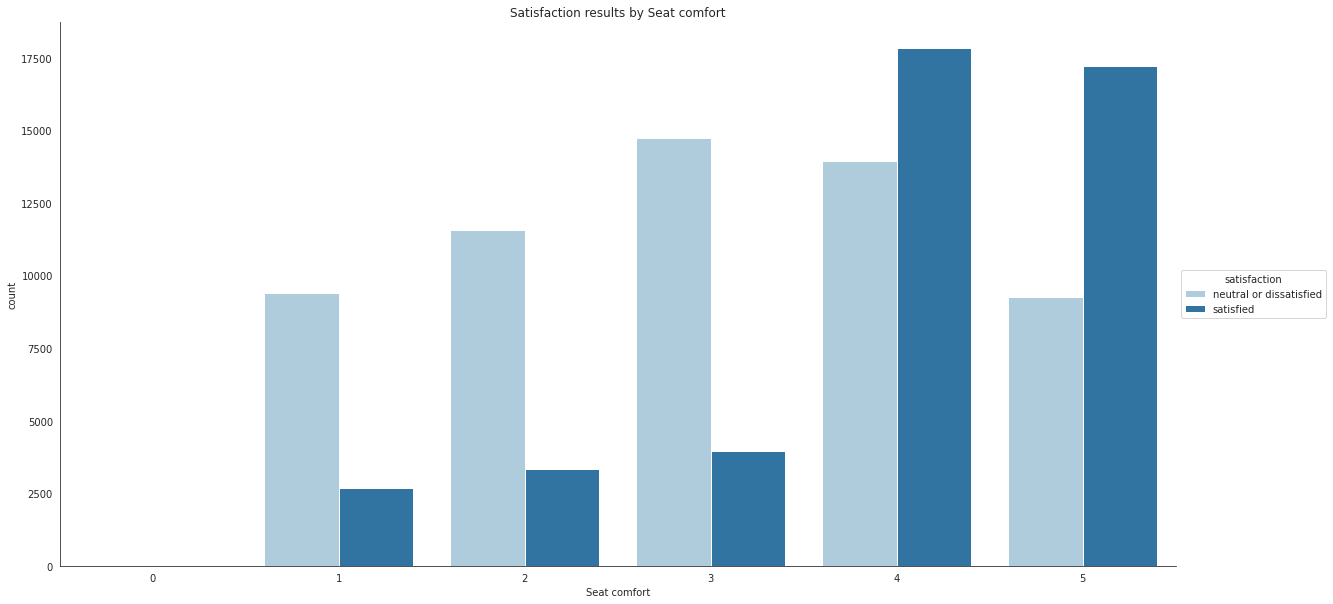

In [57]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Seat comfort", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Seat comfort")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [58]:
# calcuate dissatisfied_rate
pivot_satisfaction(df,"Seat comfort")

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,9380,2695,12075,77.681159
2,2,11558,3339,14897,77.586091
3,3,14741,3955,18696,78.845742
4,4,13940,17825,31765,43.884779
5,5,9259,17211,26470,34.979222


In [59]:
# calcuate dissatisfied_rate for Seat comfort -business
pivot_satisfaction(Business_Travel,"Seat comfort")

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,4732,2177,6909,68.490375
2,2,6533,2762,9295,70.285100
3,3,9005,3357,12362,72.844200
4,4,6730,16957,23687,28.412209
5,5,2908,16493,19401,14.988918


In [60]:
# calcuate dissatisfied_rate for Seat comfort -personal
pivot_satisfaction(Personal_travel,"Seat comfort")

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,4648,518,5166,89.972900
1,2,5025,577,5602,89.700107
2,3,5736,598,6334,90.558889
3,4,7210,868,8078,89.254766
4,5,6351,718,7069,89.842976


In [61]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Business,"Seat comfort")

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,1,0,1,100.000000
1,1,1948,1547,3495,55.736767
2,2,2929,1932,4861,60.255092
3,3,5003,2240,7243,69.073588
4,4,3945,14543,18488,21.338165
5,5,1359,14218,15577,8.724401


In [62]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Eco,"Seat comfort")

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,6490,990,7480,86.764706
1,2,7475,1222,8697,85.949178
2,3,8378,1435,9813,85.376541
3,4,8703,2660,11363,76.590689
4,5,6998,2394,9392,74.510221


In [63]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Eco_Plus,"Seat comfort")

,Seat comfort,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,942,158,1100,85.636364
1,2,1154,185,1339,86.183719
2,3,1360,280,1640,82.926829
3,4,1292,622,1914,67.502612
4,5,902,599,1501,60.093271


## Leg room service
Leg room is a common topic of consideration for travellers and the passengers for this airline is no exception. Overall, as well as breakdown by traveller type all indicate that as the scores on leg room services increase, the satisfaction level also increased. 

The level of changes amongst personal travellers, however, is somewhat limited compared to business travellers. reviewing the travel class indicates that the issue lies with the Economy tickets. As such, this could be a reflection of intentional actions by the airline to keep such ticket prices low. (Reduced leg space for more seating at a reduced price.) 


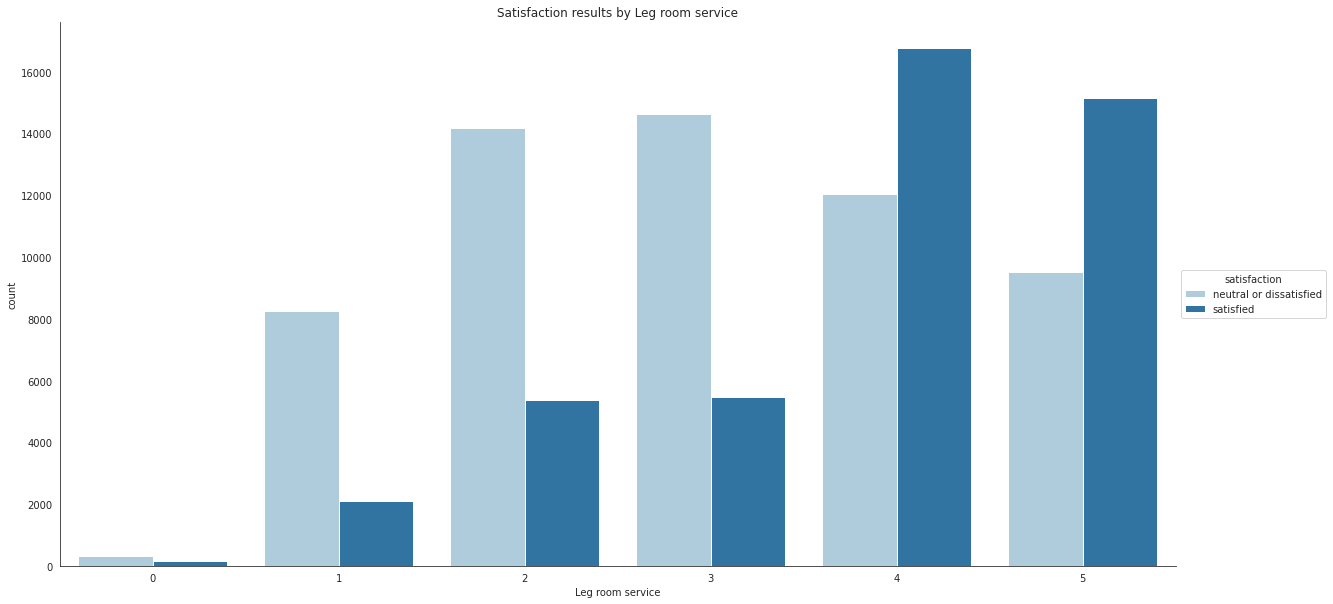

In [64]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ='Leg room service', data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Leg room service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [65]:
# calcuate dissatisfied_rate
pivot_satisfaction(df,'Leg room service')

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,306,166,472,64.830508
1,1,8253,2100,10353,79.716024
2,2,14162,5363,19525,72.532650
3,3,14623,5475,20098,72.758483
4,4,12025,16764,28789,41.769426
5,5,9510,15157,24667,38.553533


In [66]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Business_Travel,'Leg room service')

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,72,0,72,100.000000
1,1,4821,1825,6646,72.539874
2,2,7207,4789,11996,60.078359
3,3,7421,4897,12318,60.245170
4,4,5910,15899,21809,27.098904
5,5,4478,14336,18814,23.801424


In [67]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Personal_travel,'Leg room service')

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,234,166,400,58.500000
1,1,3432,275,3707,92.581602
2,2,6955,574,7529,92.376146
3,3,7202,578,7780,92.570694
4,4,6115,865,6980,87.607450
5,5,5032,821,5853,85.973005


In [68]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Business,'Leg room service')

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,97,28,125,77.600000
1,1,2131,748,2879,74.018757
2,2,4119,3439,7558,54.498545
3,3,4198,3611,7809,53.758484
4,4,2832,14056,16888,16.769304
5,5,1808,12598,14406,12.550326


In [69]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Eco,'Leg room service')

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,182,125,307,59.283388
1,1,5305,1063,6368,83.307161
2,2,8728,1597,10325,84.532688
3,3,9053,1549,10602,85.389549
4,4,8038,2259,10297,78.061571
5,5,6738,2108,8846,76.170020


In [70]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Eco_Plus,'Leg room service')

,Leg room service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,27,13,40,67.500000
1,1,817,289,1106,73.869801
2,2,1315,327,1642,80.085262
3,3,1372,315,1687,81.327801
4,4,1155,449,1604,72.007481
5,5,964,451,1415,68.127208


## Cleanliness
On an upper level view, cleanliness appears to be valued by passengers. Furthermore, if the airline wishes to secure more business travellers, investment here may be valued as there is an approx. 56.5 percentage point difference in those who scored cleanliness as 1 and 5 and their level of overall satisfaction. 

For those travelling for personal reasons were less affected by cleanliness. However, unlike other aspects, class does not appear to have an impact on how cleanliness appear to be the critical factor. As such, whilst cleanliness is important, it is not a major factor defining satisfaction. This is to say, additional investment into cleanliness at this time is not required. Cost cutting and other decreases in quality of service should, however, be done with caution. 

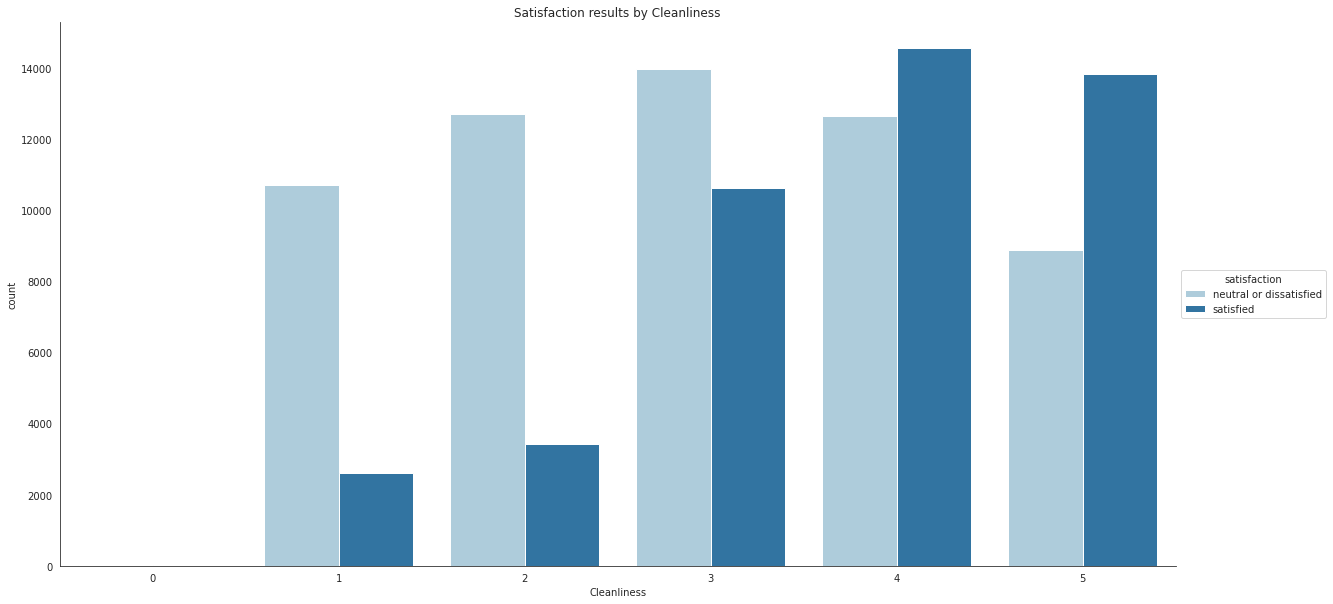

In [71]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ='Cleanliness', data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Cleanliness")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [72]:
# calcuate dissatisfied_rate
pivot_satisfaction(df,'Cleanliness')

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,12,0,12,100.000000
1,1,10705,2613,13318,80.379937
2,2,12696,3436,16132,78.700719
3,3,13961,10613,24574,56.812078
4,4,12629,14550,27179,46.466022
5,5,8876,13813,22689,39.120279


In [73]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Business_Travel,'Cleanliness')

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,12,0,12,100.000000
1,1,6124,2070,8194,74.737613
2,2,7326,2836,10162,72.092108
3,3,7397,9903,17300,42.757225
4,4,6075,13798,19873,30.569114
5,5,2975,13139,16114,18.462207


In [74]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Personal_travel,'Cleanliness')

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,4581,543,5124,89.402810
1,2,5370,600,5970,89.949749
2,3,6564,710,7274,90.239208
3,4,6554,752,7306,89.707090
4,5,5901,674,6575,89.749049


In [75]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Business,"Cleanliness")

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,4,0,4,100.000000
1,1,3227,1503,4730,68.224101
2,2,3597,1962,5559,64.705882
3,3,3787,8899,12686,29.851805
4,4,3269,11352,14621,22.358252
5,5,1301,10764,12065,10.783257


In [76]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Eco,"Cleanliness")

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,6489,960,7449,87.112364
2,2,7869,1272,9141,86.084673
3,3,8743,1459,10202,85.698883
4,4,8221,2578,10799,76.127419
5,5,6719,2432,9151,73.423670


In [77]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Eco_Plus,"Cleanliness")

,Cleanliness,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,5,0,5,100.000000
1,1,989,150,1139,86.830553
2,2,1230,202,1432,85.893855
3,3,1431,255,1686,84.875445
4,4,1139,620,1759,64.752700
5,5,856,617,1473,58.112695


## Inflight WIFI service
WIFI appears to follow the trend expected based on the overall result of the services. As the experience improves the passenger's rating of the overall service also altered. In addition, the pivotal point is the score of 3/4. The dissatisfaction rate dropped approx. 35% 

Therefore, it could be said that improvements here may lead to major gains for the airline. That said, as 3 is the median rating a passenger could provide, increasing satisfaction from 3 to 4 may prove to be challenging. 

Examining the data under the lens of travel type, highlights further information. For business travellers, between the score of 2 and 3, there is a drop in dissatisfaction by just under 1%. As such, investing in WIFI may likely to further improve the overall satisfaction rating. 

As for personal travel, for those who rated  the service between 1 and 3,  reported that they were dissatisfied with the service overall. This drastic difference between business and personal travellers suggest there may be a factor underpinning their experience of inflight WIFI. This underling factor appears the travel class. Similar levels of dissatisfaction can be noted as per the below tables. 

Inferring from this, it is likely that there may be caveats to using the inflight WIFI for Eco and Eco-plus passengers which affect their view of the service and in turn the overall rating of the service. For instance additional costs which are too high. The Airline may wish to investigate the issues pertaining to this services with particular focus on Eco and Eco Plus class. 

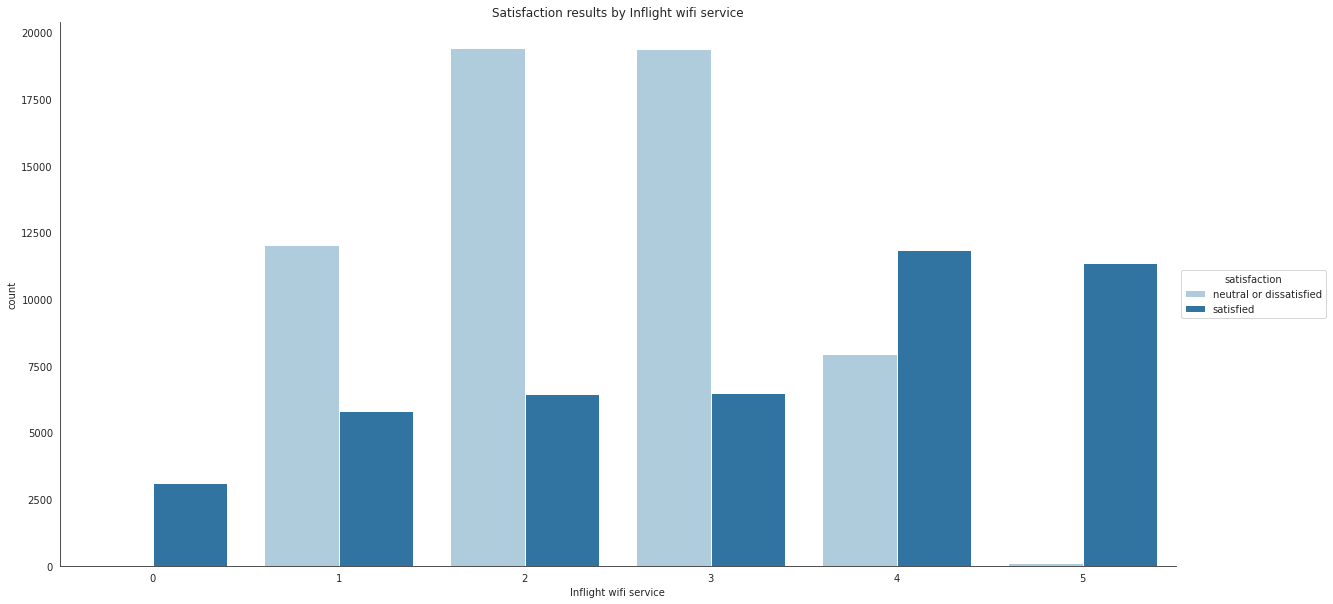

In [78]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Inflight wifi service", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Inflight wifi service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [79]:
# calcuate dissatisfied_rate 
pivot_satisfaction(df,"Inflight wifi service")

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,8,3095,3103,0.257815
1,1,12034,5806,17840,67.455157
2,2,19407,6423,25830,75.133566
3,3,19386,6482,25868,74.942013
4,4,7938,11856,19794,40.103062
5,5,106,11363,11469,0.924231


In [80]:
# calcuate dissatisfied_rate for Inflight wifi service - business
pivot_satisfaction(Business_Travel,"Inflight wifi service")

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,8,2444,2452,0.326264
1,1,6227,5806,12033,51.749356
2,2,9832,6423,16255,60.486004
3,3,9586,6482,16068,59.658949
4,4,4150,10529,14679,28.271681
5,5,106,10062,10168,1.042486


In [81]:
# calcuate dissatisfied_rate for Inflight wifi service - personal

pivot_satisfaction(Personal_travel,"Inflight wifi service")

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,0,651,651,0.000000
1,1,5807,0,5807,100.000000
2,2,9575,0,9575,100.000000
3,3,9800,0,9800,100.000000
4,4,3788,1327,5115,74.056696
5,5,0,1301,1301,0.000000


In [82]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Business,"Inflight wifi service")

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,0,1979,1979,0.000000
1,1,3239,5803,9042,35.821721
2,2,5000,6088,11088,45.093795
3,3,4789,6074,10863,44.085428
4,4,2086,7350,9436,22.106825
5,5,71,7186,7257,0.978366


In [83]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Eco,"Inflight wifi service")

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,926,929,0.322928
1,1,7663,2,7665,99.973907
2,2,12527,274,12801,97.859542
3,3,12743,321,13064,97.542866
4,4,5086,3757,8843,57.514418
5,5,22,3421,3443,0.638978


In [84]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Eco_Plus,"Inflight wifi service")

,Inflight wifi service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,5,190,195,2.564103
1,1,1132,1,1133,99.911739
2,2,1880,61,1941,96.857290
3,3,1854,87,1941,95.517774
4,4,766,749,1515,50.561056
5,5,13,756,769,1.690507


## Food & drink
Food appears to have a similar impact on overall satisfaction as WIFI. Increases in the food score appears to show a decline in the overall dissatisfaction. However, the scale of shift appears to be limited in comparison to WIFI. 

As before, the variable can be reviewed in context with the purpose of the travel. This indicates  that business travellers were more appreciative of the quality of food than personal travellers. In addition. based upon the rate of dissatisfaction of personal travellers, the airline may benefit from first focusing on WIFI and then on food if these two variables were their primary focus. 

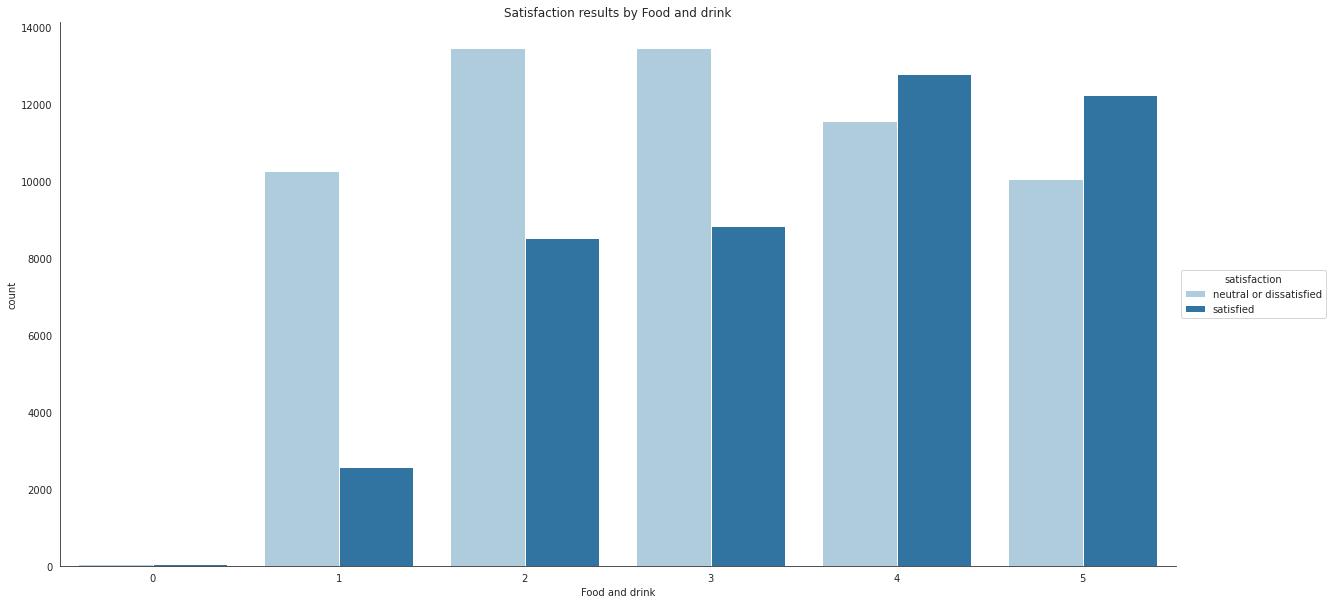

In [85]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Food and drink", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Food and drink")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [86]:
# calcuate dissatisfied_rate
pivot_satisfaction(df,"Food and drink")

,Food and drink,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,57,50,107,53.271028
1,1,10269,2568,12837,79.995326
2,2,13458,8530,21988,61.206112
3,3,13461,8839,22300,60.363229
4,4,11571,12788,24359,47.501950
5,5,10063,12250,22313,45.099269


In [87]:
# calcuate dissatisfied_rate for  Food and drink - business 
pivot_satisfaction(Business_Travel,"Food and drink")

,Food and drink,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,23,32,55,41.818182
1,1,5749,2062,7811,73.601331
2,2,7146,7862,15008,47.614606
3,3,7121,8165,15286,46.585111
4,4,5584,12073,17657,31.624851
5,5,4286,11552,15838,27.061498


In [88]:
# calcuate dissatisfied_rate for Food and drink -  personal
pivot_satisfaction(Personal_travel,"Food and drink")

,Food and drink,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,34,18,52,65.384615
1,1,4520,506,5026,89.932352
2,2,6312,668,6980,90.429799
3,3,6340,674,7014,90.390647
4,4,5987,715,6702,89.331543
5,5,5777,698,6475,89.220077


## Inflight entertainment 
Inflight entertainment show that those who rated the entertainment highly, also found the overall service satisfactory. Business travellers were particularly sensitive to good entertainment with a 67 percentage point decrease in dissatisfaction as scores on entertainment increase. 

In contrast, for personal travellers the dissatisfaction is relatively stable at around 89-90%. Reviewing the travel class highlights that the issue may lie with the offerings made to Eco travellers. The differences between Eco and Eco-Plus suggest either that the offering itself differs or that the passengers expected better and the airline is failing to match this expectation. In either case, the airline may need to re-evaluate it's entertainment offering for Eco and in turn Eco-Plus passengers. (Evaluating only Eco passengers may lead to issues as the difference between Eco and Eco-Plus may become too narrow to justify the difference in ticket prices) 

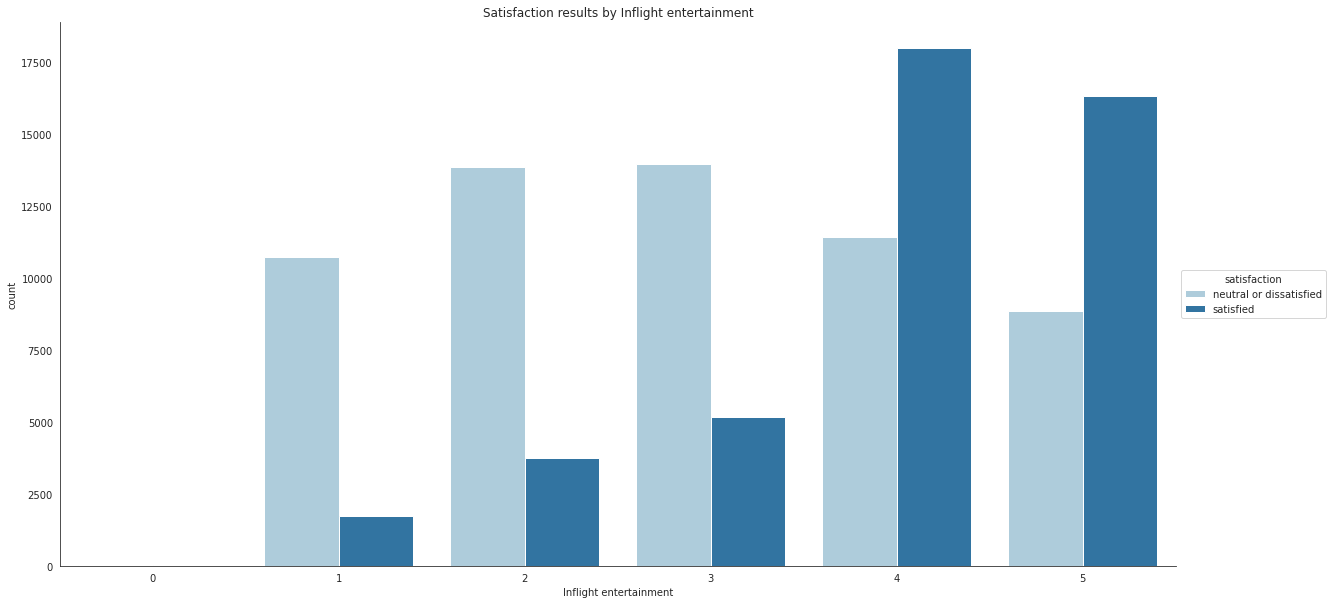

In [89]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Inflight entertainment", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Inflight entertainment")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [90]:
# calcuate dissatisfied_rate 
pivot_satisfaction(df,"Inflight entertainment")

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,14,0,14,100.000000
1,1,10733,1745,12478,86.015387
2,2,13875,3762,17637,78.669842
3,3,13970,5169,19139,72.992319
4,4,11423,18000,29423,38.823369
5,5,8864,16349,25213,35.156467


In [91]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Business_Travel,"Inflight entertainment")

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,14,0,14,100.000000
1,1,5742,1156,6898,83.241519
2,2,7949,3090,11039,72.008334
3,3,7861,4490,12351,63.646668
4,4,5355,17314,22669,23.622568
5,5,2988,15696,18684,15.992293


In [92]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Personal_travel,"Inflight entertainment")

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,4991,589,5580,89.444444
1,2,5926,672,6598,89.815095
2,3,6109,679,6788,89.997054
3,4,6068,686,6754,89.843056
4,5,5876,653,6529,89.998468


In [93]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Business,"Inflight entertainment")

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,6,0,6,100.000000
1,1,2966,876,3842,77.199375
2,2,4175,2412,6587,63.382420
3,3,4085,3659,7744,52.750517
4,4,2608,14516,17124,15.230086
5,5,1345,13017,14362,9.364991


In [94]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Eco,"Inflight entertainment")

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,6740,772,7512,89.723110
2,2,8383,1186,9569,87.605810
3,3,8502,1290,9792,86.825980
4,4,7731,2812,10543,73.328275
5,5,6685,2641,9326,71.681321


In [95]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Eco_Plus,"Inflight entertainment")

,Inflight entertainment,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,5,0,5,100.000000
1,1,1027,97,1124,91.370107
2,2,1317,164,1481,88.926401
3,3,1383,220,1603,86.275733
4,4,1084,672,1756,61.731207
5,5,834,691,1525,54.688525


## Onboard service
Onboard services follow a similar trend to other services which relate to inflight conditions, those who  rated the services highly were also more likely to view the overall service as satisfactory. Once again, business travellers were more sensitive to the quality of onboard services than personal travellers. As such, if the airline has a focus on business travellers, they may justify the increased investment in this remit. 


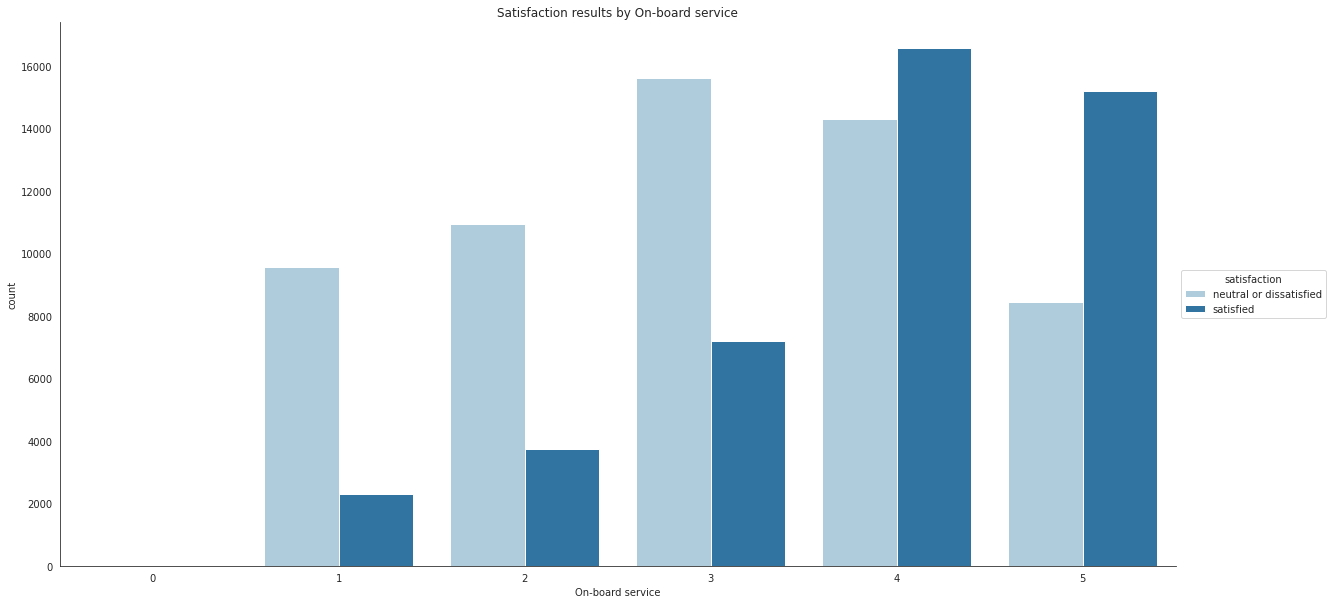

In [96]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="On-board service", data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by On-board service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [97]:
# calcuate dissatisfied_rate
pivot_satisfaction(df,"On-board service")

,On-board service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,9572,2300,11872,80.626685
2,2,10927,3754,14681,74.429535
3,3,15625,7208,22833,68.431656
4,4,14296,16571,30867,46.314835
5,5,8456,15192,23648,35.757781


In [98]:
# calcuate dissatisfied_rate for On-board service - business
pivot_satisfaction(Business_Travel,"On-board service")

,On-board service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,5790,1851,7641,75.775422
2,2,6850,3318,10168,67.368214
3,3,8066,6345,14411,55.971133
4,4,6804,15701,22505,30.233281
5,5,2396,14531,16927,14.154900


In [99]:
# calcuate dissatisfied_rate for On-board service - personal
pivot_satisfaction(Personal_travel,"On-board service")

,On-board service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,3782,449,4231,89.387852
1,2,4077,436,4513,90.339021
2,3,7559,863,8422,89.753028
3,4,7492,870,8362,89.595790
4,5,6060,661,6721,90.165154


## Inflight service
Inflight services follow a familiar pattern of increased scores appearing to correlate with higher overall satisfaction. However, the pivotal point is relatively high as the balance in favour of satisfied only dominates amongst those who rated the inflight services as a 5. This suggest that this is not a major factor affecting the passenger's view of the airline. Therefore, the airline may see greater benefits in investing in other areas before turning their attention to inflight services.

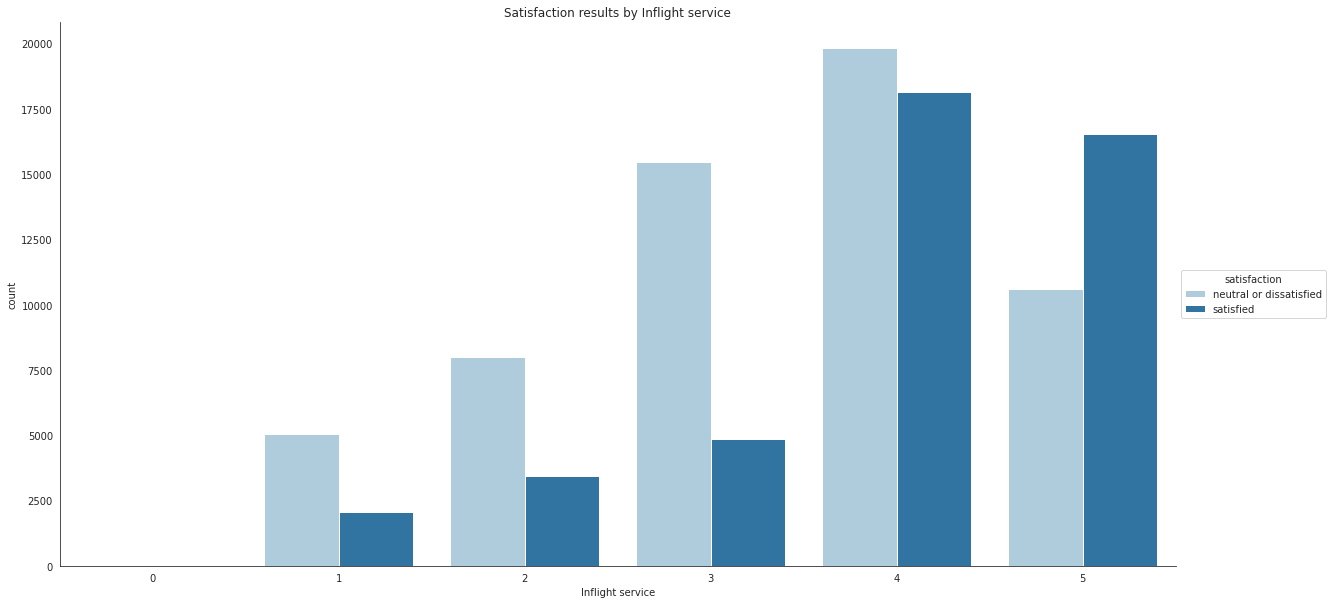

In [100]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ='Inflight service', data = df, hue ="satisfaction",palette ="Paired" )

# format graph
plt.title("Satisfaction results by Inflight service")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

In [101]:
# calcuate dissatisfied_rate
pivot_satisfaction(df,'Inflight service')

,Inflight service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,5030,2054,7084,71.005082
2,2,8006,3451,11457,69.878677
3,3,15448,4851,20299,76.102271
4,4,19816,18129,37945,52.222954
5,5,10576,16540,27116,39.002803


In [102]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Business_Travel,'Inflight service')

,Inflight service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,0,3,0,3,100.000000
1,1,2611,1796,4407,59.246653
2,2,4819,3084,7903,60.976844
3,3,9843,4241,14084,69.887816
4,4,9696,16927,26623,36.419637
5,5,2937,15698,18635,15.760665


In [103]:
# calcuate new dissatisfied_rate 
pivot_satisfaction(Personal_travel,'Inflight service')

,Inflight service,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,1,2419,258,2677,90.362346
1,2,3187,367,3554,89.673607
2,3,5605,610,6215,90.185036
3,4,10120,1202,11322,89.383501
4,5,7639,842,8481,90.071925


# Strategic order to improve services 
There are many methods by which the airline may attempt to improve its services. One such method would be to establish a regression model and begin the improvements by those which show the highest level of correlation to the overall satisfaction. In this case, the logistic regression shows the following: 


In [104]:
from sklearn.linear_model import LogisticRegression

#create dummy variable 
satisfaction_dummmy = pd.get_dummies(df["satisfaction"], drop_first = True)
Gender_dummmy = pd.get_dummies(df["Gender"], drop_first = True)
Customer_dummmy = pd.get_dummies(df["Customer Type"], drop_first = True)
Type_dummmy = pd.get_dummies(df["Type of Travel"], drop_first = True)

df = pd.concat([df, satisfaction_dummmy, Gender_dummmy, Customer_dummmy, Type_dummmy], axis=1)

# encode values where there would be several outcomes 
from sklearn.preprocessing import LabelEncoder 

# encode class variable
le = LabelEncoder()
df['Class_code'] = le.fit_transform(df['Class'])

# sort order of variables 
df = df[['id', 'Gender','Male', 'Customer Type','disloyal Customer', 'Age', 'Type of Travel','Personal Travel', 'Class',
       'Class_code','Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Total_score', 'Departure Delay in Minutes','Arrival Delay in Minutes','Departure Delay in hour',
               'Arrival Delay in hour', 'satisfaction', 'satisfied', ]]
#drop any missing values to avoid any errors - the dataset is large to accomodate for this action
df_processed = df.dropna(axis = 0)

# establish X and Y variables
X= df_processed[['Male', 'disloyal Customer', 'Age', 'Personal Travel', 'Class_code','Flight Distance', 
       'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',"Departure Delay in hour",'Arrival Delay in hour',]]
Y = df_processed['satisfied']

# scale variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

inputs_scaled = scaler.transform(X)

# creare regression model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, Y, test_size = 0.3, random_state= 360 )

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

coef = pd.DataFrame(logmodel.coef_).T
coef["abs"] = coef[0].abs()

coef.set_index(X.columns).sort_values(by = "abs", ascending = False)

,0,abs
Personal Travel,-1.318821,1.318821
Online boarding,0.836814,0.836814
disloyal Customer,-0.809410,0.809410
Inflight wifi service,0.512406,0.512406
Checkin service,0.416211,0.416211
On-board service,0.382187,0.382187
Arrival Delay in hour,-0.337184,0.337184
Class_code,-0.336375,0.336375
Leg room service,0.329225,0.329225
Cleanliness,0.302297,0.302297


Based upon this, the airline can prioritise aspects which can be tackled to improve the service. As the model includes all possible variables, some aspects will require the airline to conduct additional investigation prior to corrective action. 

For instance as this report and the model highlights the nature of travel has a significant impact on the level of satisfaction. However it is not clear based on the data available why this variable appear so prominent. It may be aspects such as cost of tickets which is reflected under this factor. 

It should also be acknowledged that aspects of this is a reflection off the airline's  prerogative. For instance, loyal customers by their nature are more likely to be satisfied with the service and will be strength through secret details and offers. 

For disclosure the model which takes into account every aspect of the passenger data, is only 87%. As such improvements in the specific areas may not always convert to improvements in the satisfaction level. Additionally, as mentioned, the airline's overall strategy will also shape the satisfaction rating. Some aspects of improvements will also require further investigation to implement effective improvements, such as why passengers appear to be particularly dissatisfied with the services offered in Economy flights. That said, if the airline wishes to design a model to predict the passenger's satisfaction, alternative methods should be examined.

In [105]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[15952  1679]
 [ 2254 11287]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     17631
           1       0.87      0.83      0.85     13541

    accuracy                           0.87     31172
   macro avg       0.87      0.87      0.87     31172
weighted avg       0.87      0.87      0.87     31172



If the airline wishes to focus solely on the services provided and avoid complex further investigations, they may wish to improve their offerings on online boarding and leg room services. Following is the revised model of the logistic regression focusing on only the service related aspects of the survey. 

In [106]:
X= df_processed[['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',"Departure Delay in hour",'Arrival Delay in hour',]]
Y = df_processed['satisfied']

scaler = StandardScaler()
scaler.fit(X)

inputs_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, Y, test_size = 0.3, random_state= 360 )

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

coef = pd.DataFrame(logmodel.coef_).T
coef["abs"] = coef[0].abs()

coef.set_index(X.columns).sort_values(by = "abs", ascending = False)

,0,abs
Online boarding,1.131603,1.131603
Leg room service,0.461654,0.461654
Departure/Arrival time convenient,-0.455164,0.455164
Inflight wifi service,0.397610,0.397610
Inflight entertainment,0.380551,0.380551
On-board service,0.347380,0.347380
Checkin service,0.280301,0.280301
Arrival Delay in hour,-0.274991,0.274991
Seat comfort,0.209104,0.209104
Ease of Online booking,-0.197513,0.197513


In [107]:
print("Logistic Model - reading month excluded")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

Logistic Model - reading month excluded
[[15027  2604]
 [ 3062 10479]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     17631
           1       0.80      0.77      0.79     13541

    accuracy                           0.82     31172
   macro avg       0.82      0.81      0.81     31172
weighted avg       0.82      0.82      0.82     31172



Finally as it appears that the airline specialises in business travellers, if they wish to further strength this aspect they may wish to consider investing in the following order. 

In [108]:
Business_Travel = df_processed[df_processed["Type of Travel"]=="Business travel"]
Personal_travel = df_processed[df_processed["Type of Travel"]=="Personal Travel"]


X= Business_Travel[['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',"Departure Delay in hour",'Arrival Delay in hour',]]
Y = Business_Travel['satisfied']

scaler = StandardScaler()
scaler.fit(X)

inputs_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, Y, test_size = 0.3, random_state= 360 )

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)



coef = pd.DataFrame(logmodel.coef_).T
coef["abs"] = coef[0].abs()

coef.set_index(X.columns).sort_values(by = "abs", ascending = False)

,0,abs
Online boarding,1.208701,1.208701
On-board service,0.526407,0.526407
Inflight entertainment,0.496261,0.496261
Checkin service,0.455191,0.455191
Ease of Online booking,-0.331503,0.331503
Leg room service,0.325065,0.325065
Arrival Delay in hour,-0.228329,0.228329
Seat comfort,0.228182,0.228182
Departure/Arrival time convenient,0.212662,0.212662
Cleanliness,0.164013,0.164013


In [109]:
print("Logistic Model - reading month excluded")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

Logistic Model - reading month excluded
[[ 7015  1963]
 [ 1635 10884]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      8978
           1       0.85      0.87      0.86     12519

    accuracy                           0.83     21497
   macro avg       0.83      0.83      0.83     21497
weighted avg       0.83      0.83      0.83     21497



On the other hand, if they wish to pursue improvements in the offering to personal travel, whilst some accuracy is only 60%, they may wish to explore the following order.

In [110]:

X= Personal_travel[['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',"Departure Delay in hour",'Arrival Delay in hour',]]
Y = Personal_travel['satisfied']

scaler = StandardScaler()
scaler.fit(X)

inputs_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, Y, test_size = 0.3, random_state= 360 )

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

coef = pd.DataFrame(logmodel.coef_).T
coef["abs"] = coef[0].abs()

coef.set_index(X.columns).sort_values(by = "abs", ascending = False)

,0,abs
Inflight wifi service,1.289877,1.289877
Arrival Delay in hour,-0.437771,0.437771
Ease of Online booking,-0.106828,0.106828
Departure Delay in hour,0.067434,0.067434
Gate location,-0.050998,0.050998
Inflight entertainment,-0.041540,0.041540
Seat comfort,0.039464,0.039464
Food and drink,0.034479,0.034479
Baggage handling,0.034062,0.034062
On-board service,-0.029756,0.029756


In [111]:
print("Logistic Model - reading month excluded")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

Logistic Model - reading month excluded
[[8666    0]
 [ 807  202]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      8666
           1       1.00      0.20      0.33      1009

    accuracy                           0.92      9675
   macro avg       0.96      0.60      0.64      9675
weighted avg       0.92      0.92      0.89      9675



# Conclusion 
This is a report evaluating an airline passenger satisfaction survey. It shows some concerning insights pertaining to low levels of satisfaction of the services. Without discussions with the airline, it is unclear whether aspects of this dissatisfaction is related to the airline's intentional strategy, focusing on business travellers.  If not, the airline has noticeable weaknesses in its offering to personal travellers and especially those travelling via economy or economy plus flights. Therefore if not intention, the airline may need to invest into improving this aspect of their business.

If the airline does specialise in business travellers, it may still be in need of modernisation as younger business travellers voiced dissatisfaction with the services. 

Although there are a plethora of aspects that the airline needs to invest, tackling aspects such as their online offering may yield the best results for both business and personal travellers. Moreover as younger users are most likely to use such services, this should also be positively recieved by the younger demography. 
